Thư viện

In [90]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, classification_report 

Đọc dữ liệu

In [49]:
df = pd.read_csv("D:\Kỳ 5\BTL\Student Depression Dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


Mô tả dữ liệu

Bộ dữ liệu này tổng hợp nhiều thông tin nhằm mục đích hiểu, phân tích và dự đoán mức độ trầm cảm ở sinh viên. Bộ dữ liệu được thiết kế cho mục đích nghiên cứu tâm lý học, khoa học dữ liệu và giáo dục, cung cấp thông tin chi tiết về các yếu tố góp phần gây ra những thách thức về sức khỏe tâm thần ở sinh viên và hỗ trợ thiết kế các chiến lược can thiệp sớm.

Mô tả bài toán
    
Bài toán nhằm phân tích và dự đoán mức độ trầm cảm của sinh viên dựa trên nhiều yếu tố liên quan đến học tập, công việc, thói quen sinh hoạt và hoàn cảnh cá nhân.

Mục tiêu:

1. Hiểu các yếu tố ảnh hưởng đến sức khỏe tinh thần của sinh viên

2. Xây dựng mô hình dự đoán xem một sinh viên có bị trầm cảm hay không

Mô tả dữ liệu: Định dạng: CSV (mỗi hàng đại diện cho một học sinh) Đặc trưng:

1. ID: Mã định danh

2. Age: Tuổi

3. Gender: Giới tính

4. Profession: Lĩnh vực công việc hoặc học tập của sinh viên

5. City: Thành phố hoặc khu vực nơi sinh viên cư trú

6. Academic Pressure: Áp lực học tập

7. Work Pressure: Áp lực công việc

8. CGPA: Điểm trung bình tích lũy của sinh viên

9. Study Satisfaction: Độ hài lòng trong học tập

10. Job Satisfaction: Độ hài lòng trong công việc

11. Sleep Duration: Số giờ ngủ

12. Dietary Habits: Đánh giá chế độ ăn uống

13. Degree: Bằng cấp hoặc chương trình học thuật mà sinh viên đang theo đuổi

14. Have you ever had suicidal thoughts : phản ánh liệu sinh viên đã từng có ý định tự tử hay chưa

15. Work/Study Hours: Số giờ trung bình mỗi ngày mà sinh viên dành cho công việc hoặc học tập

16. Financial Stress: Một thước đo mức độ căng thẳng do lo lắng về tài chính

17. Family History of Mental Illness: Cho biết liệu có tiền sử gia đình mắc bệnh tâm thần hay không (Có/Không)

18. Depression: Biến mục tiêu cho biết liệu học sinh có bị trầm cảm hay không (Có/Không)

Dữ liệu gồm: 27901 sample, 17 feature và 1 target

Tổng quan dữ liệu

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

Thống kê dữ liệu

In [51]:
df_describe = df.describe()
df_describe

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


Kiểm tra dữ liệu trống

In [52]:
print(df.isnull().sum())


id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64


Thay dữ liệu trống bằng giá trị trung bình

In [53]:
df = df.fillna(df.mean(numeric_only=True))

Kiểm tra lại

In [54]:
print(df.isnull().sum())

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


Trực quan dữ liệu

In [55]:
#Bỏ cột id
df = df.drop(columns=['id'])
df_num = df.select_dtypes(include=['float64', 'int64']).columns
df_num


Index(['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
       'Financial Stress', 'Depression'],
      dtype='object')

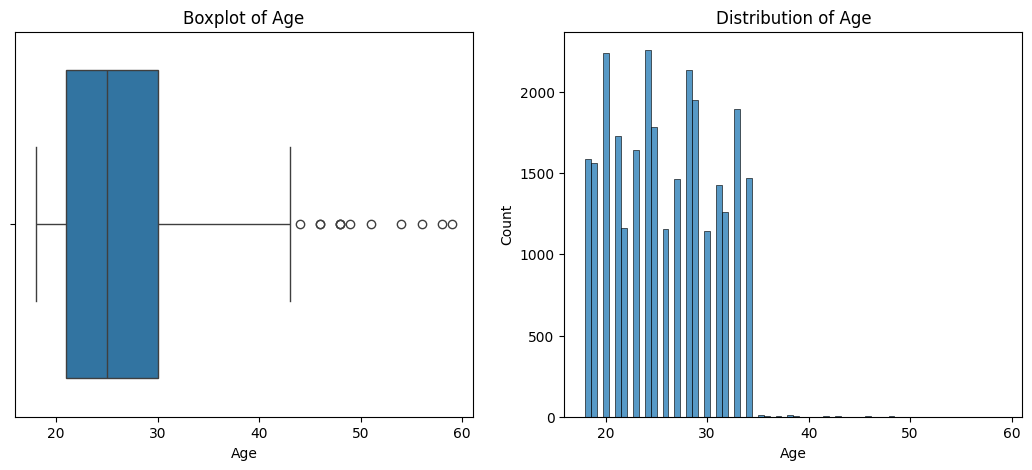

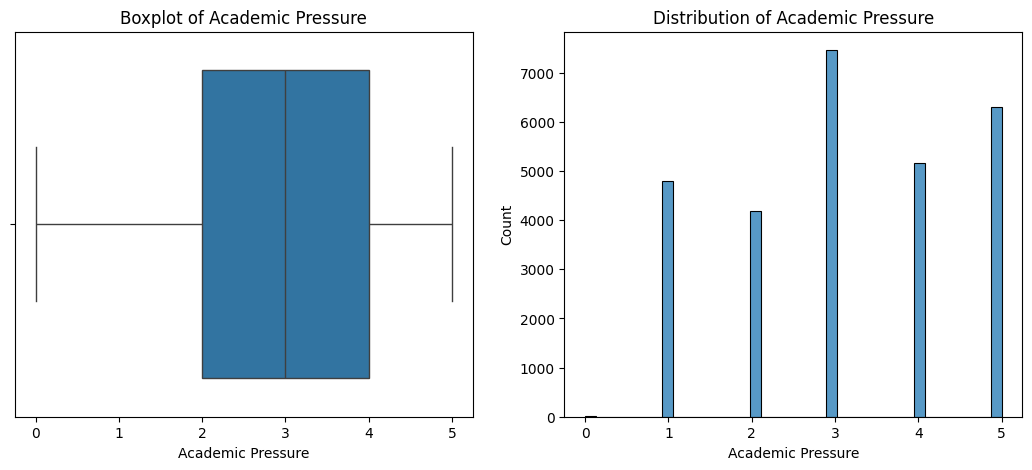

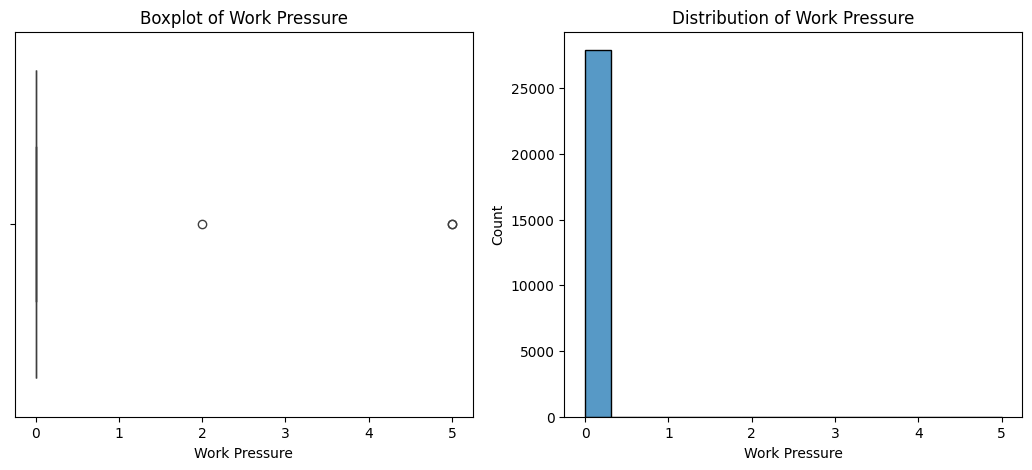

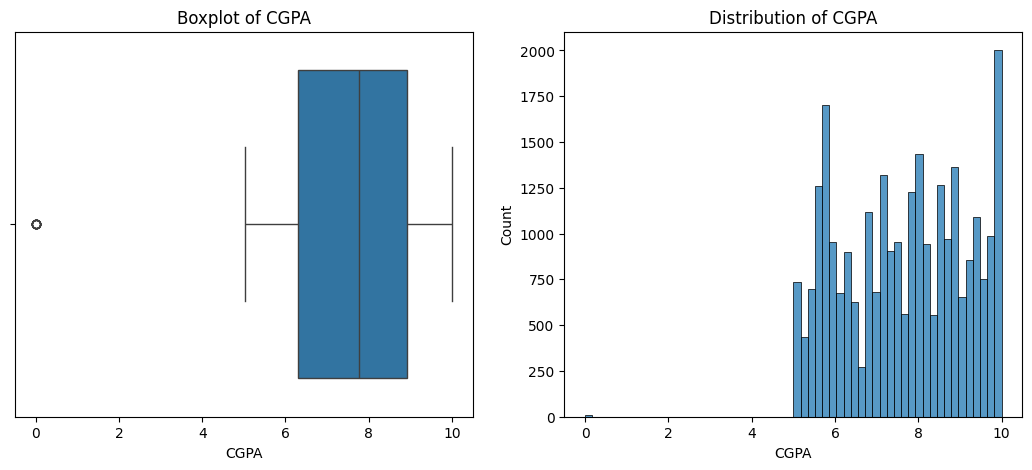

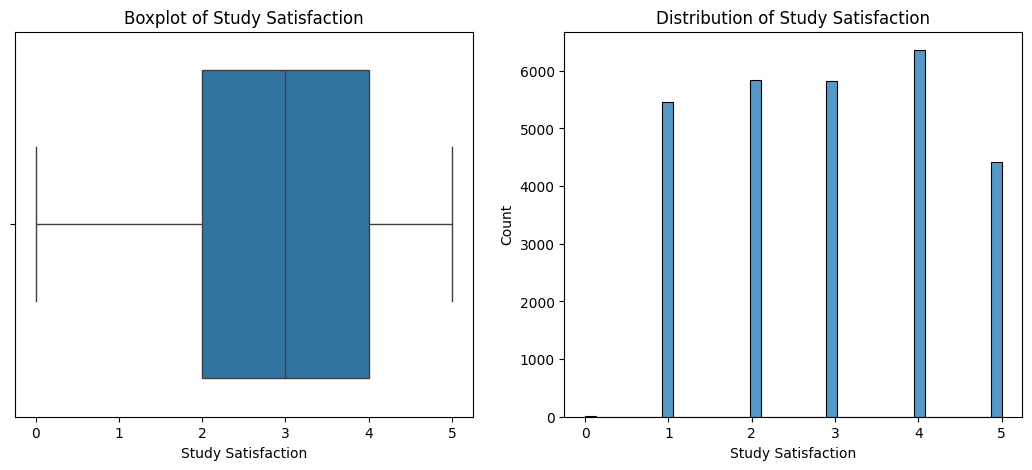

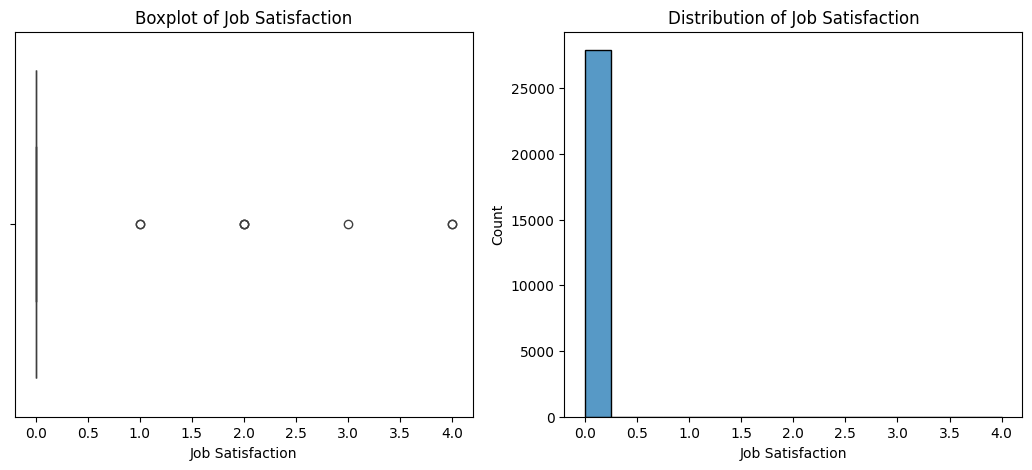

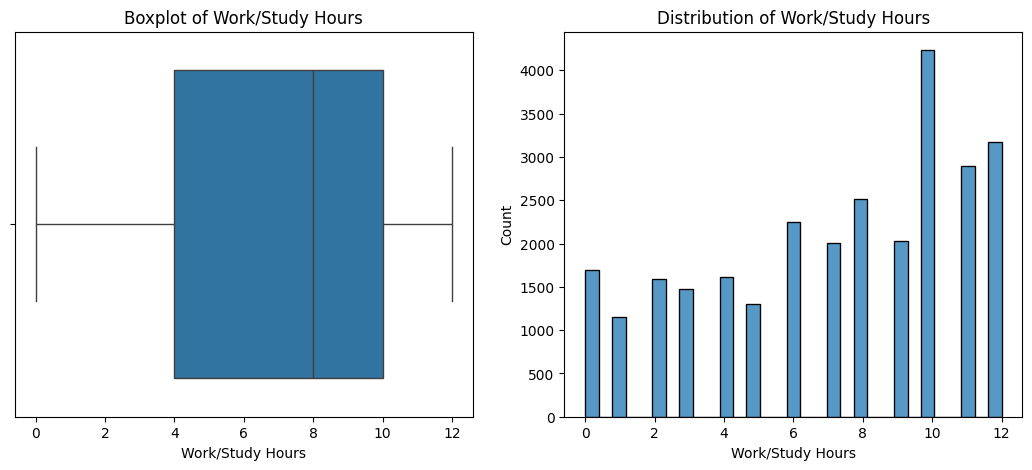

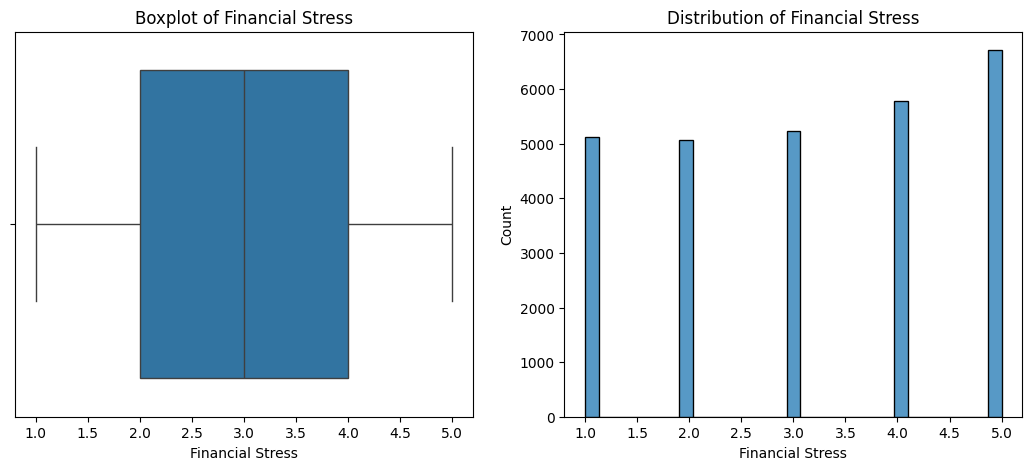

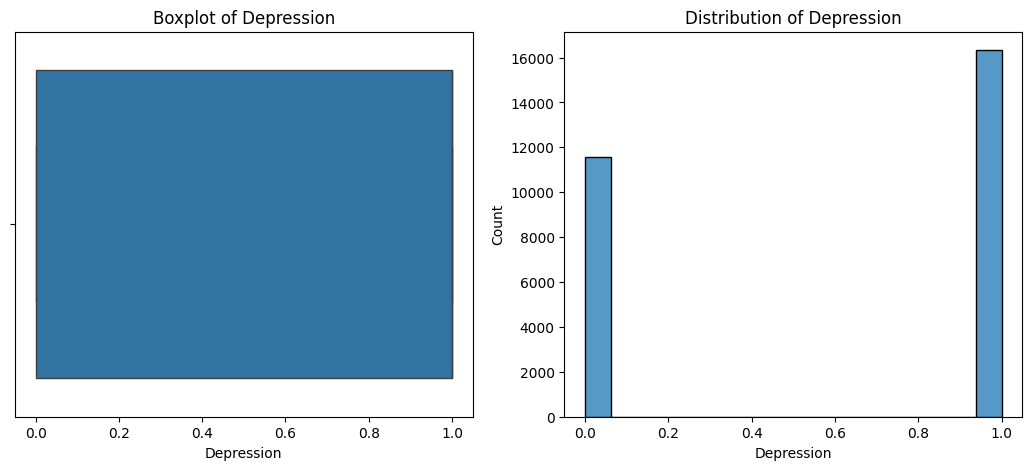

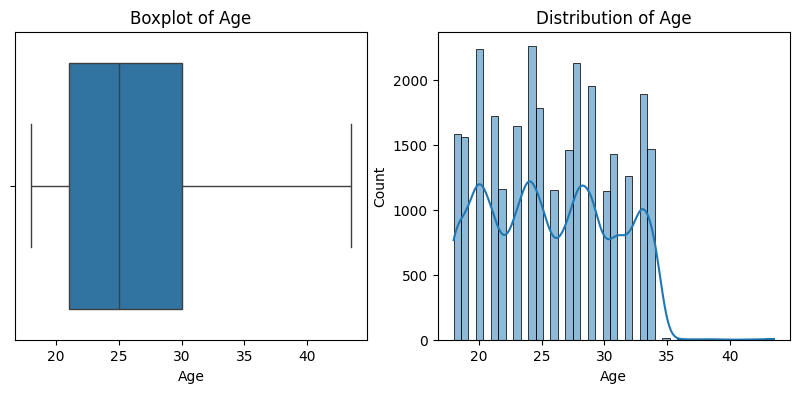

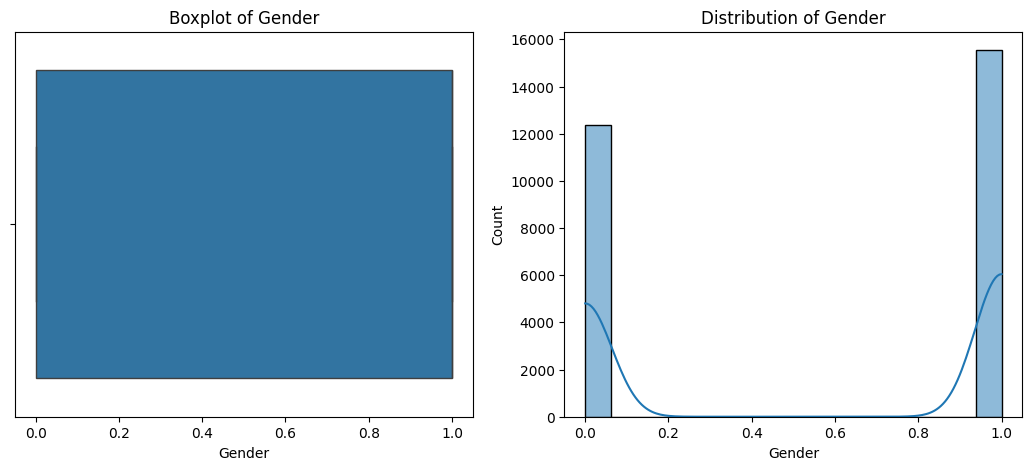

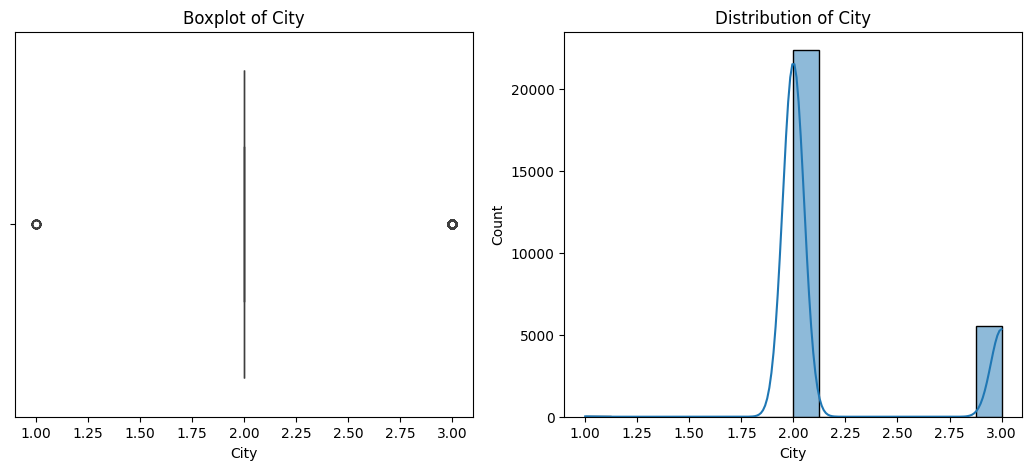

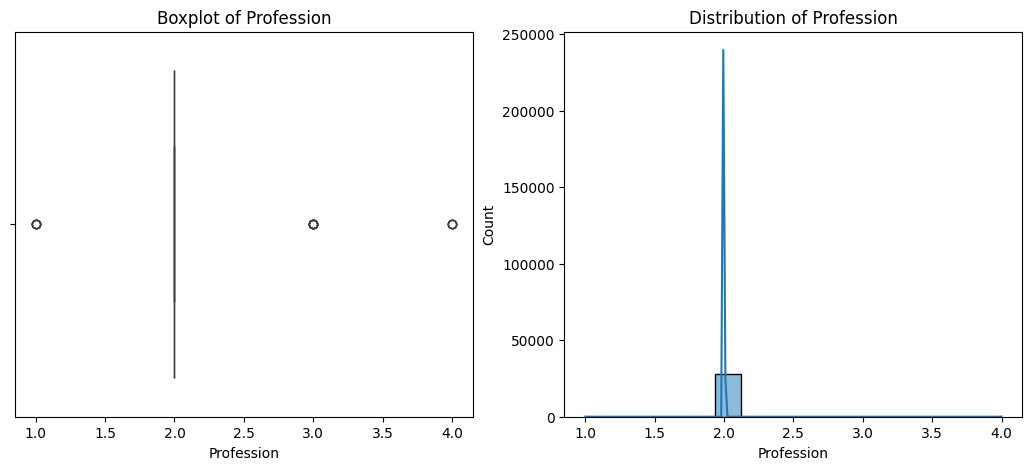

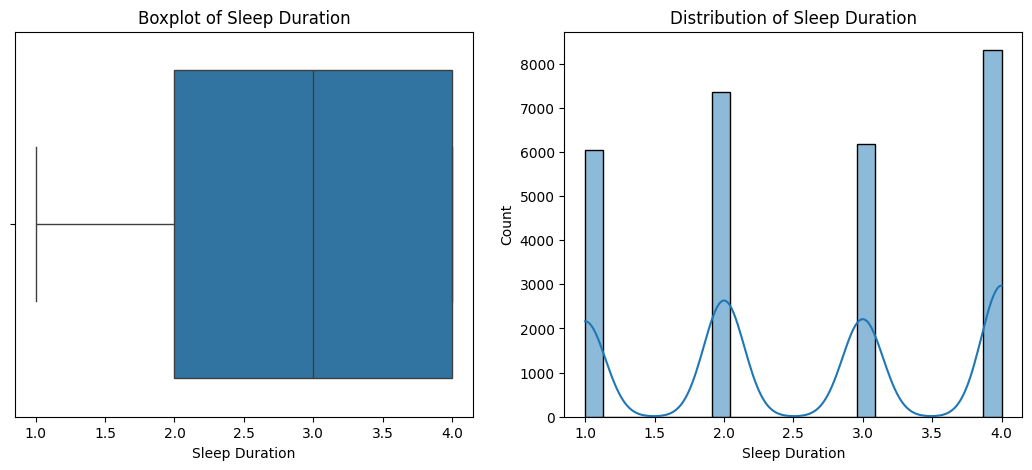

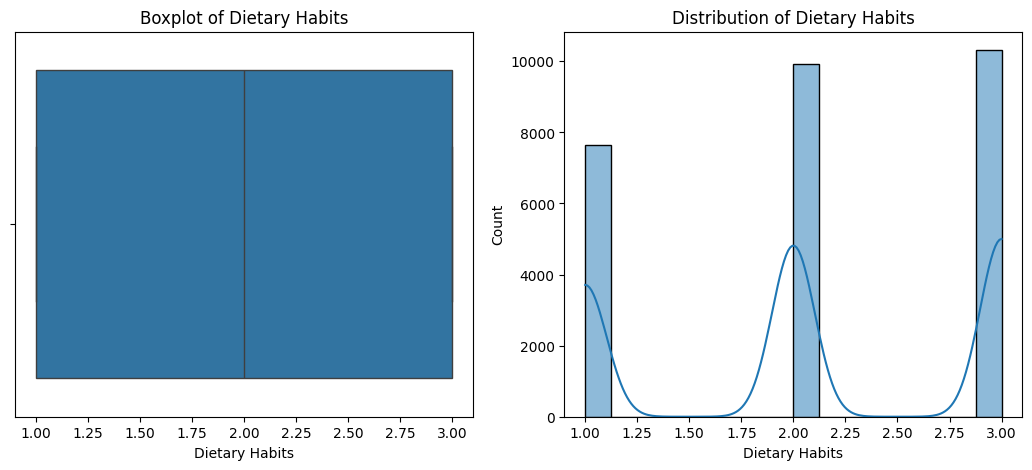

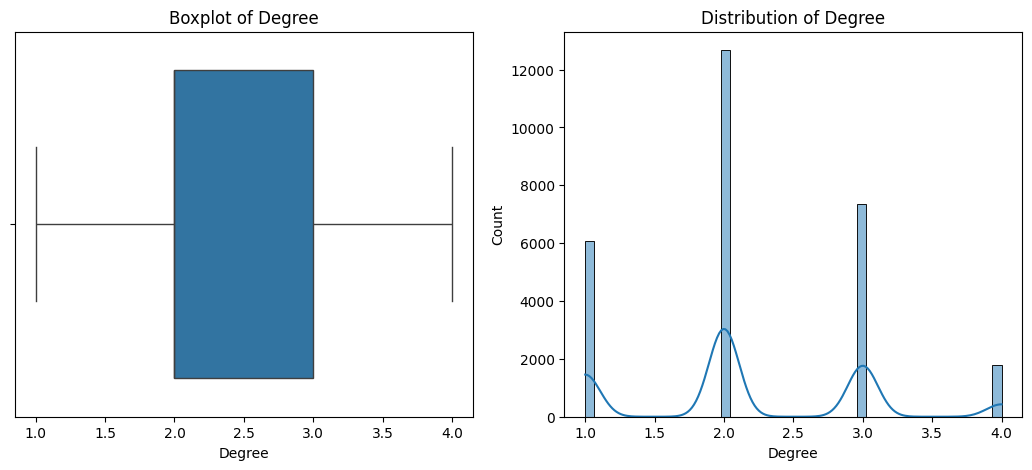

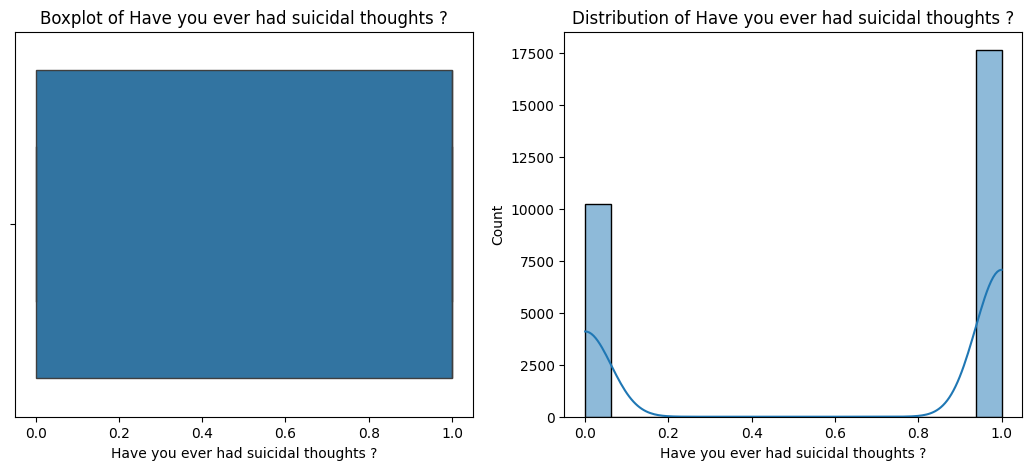

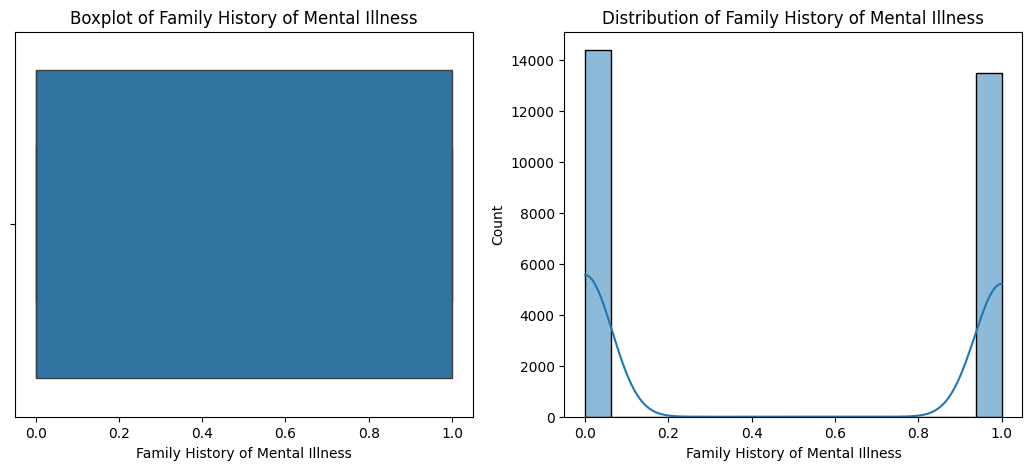

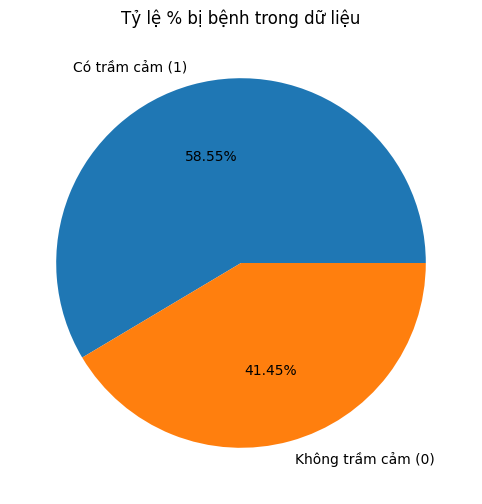

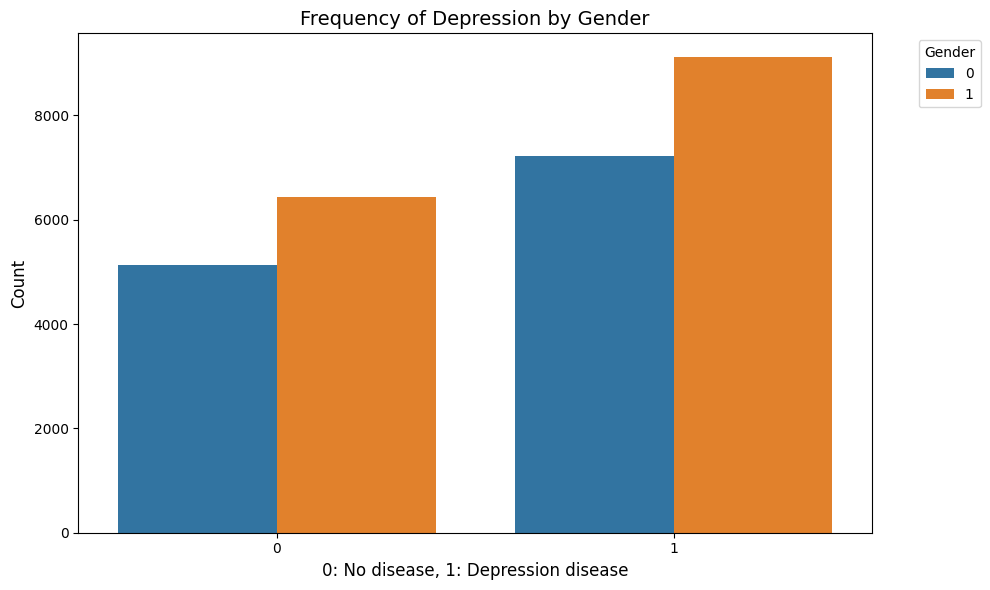

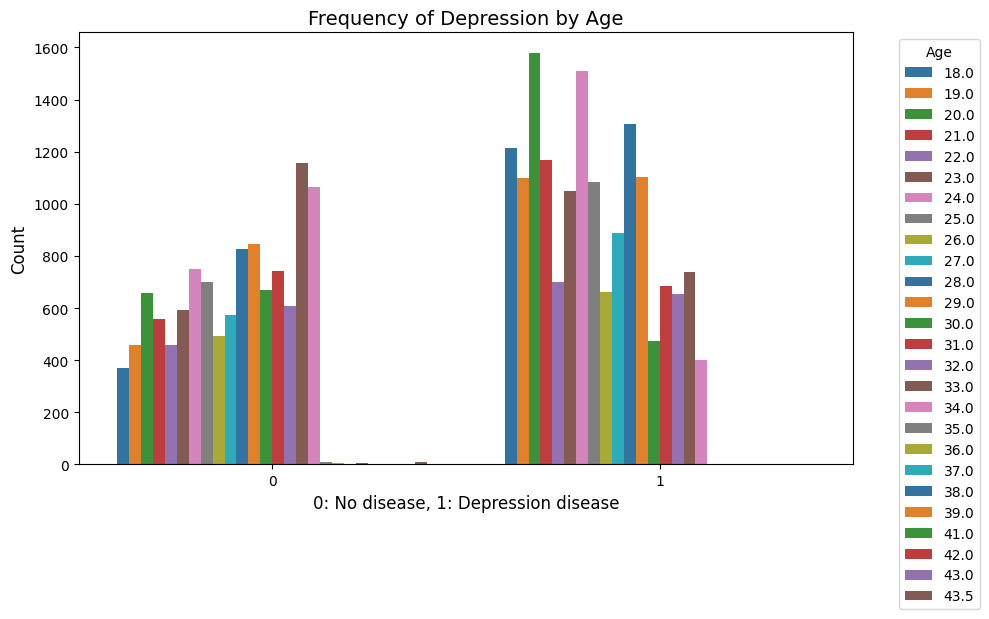

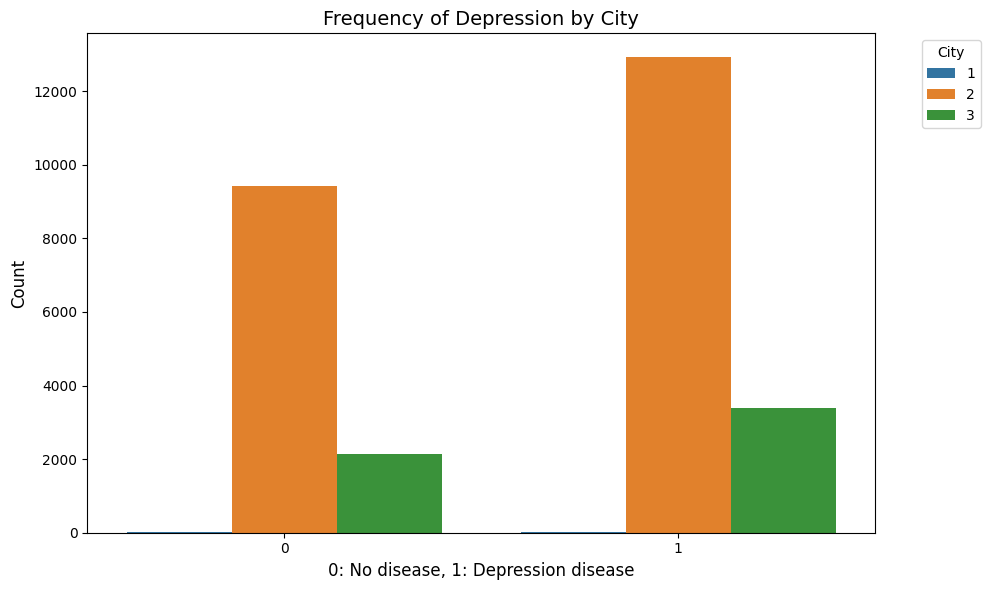

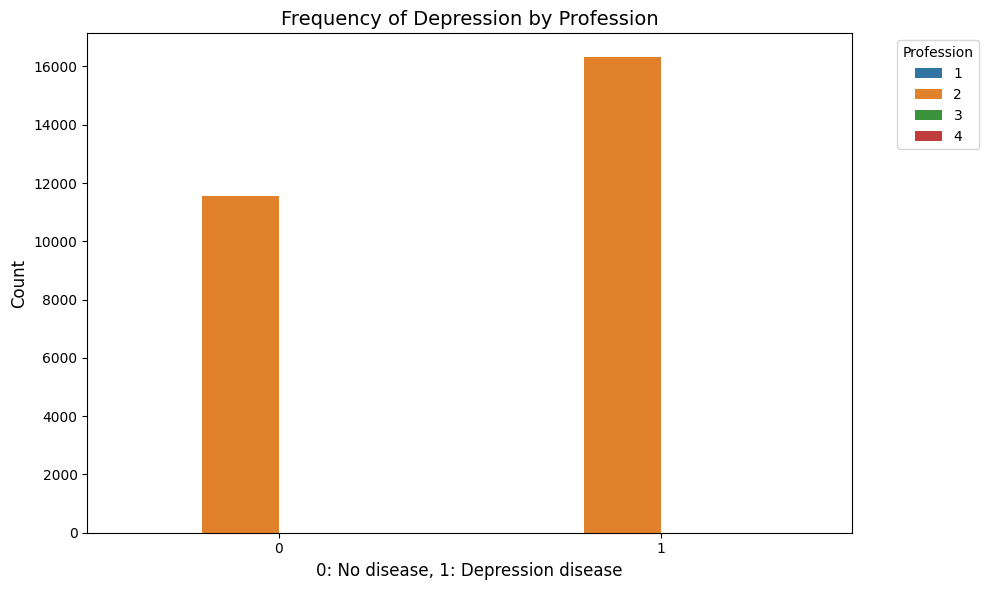

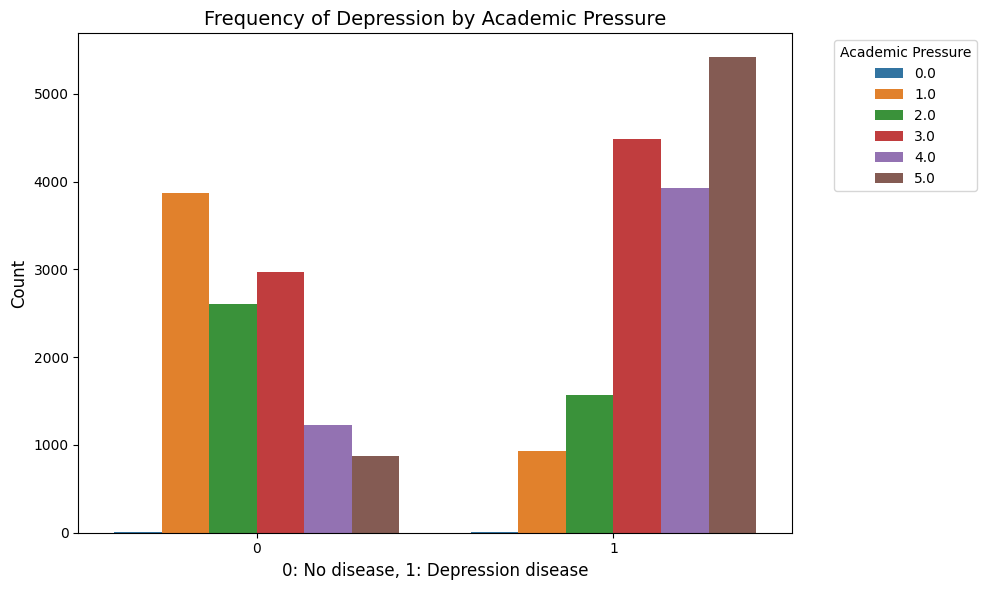

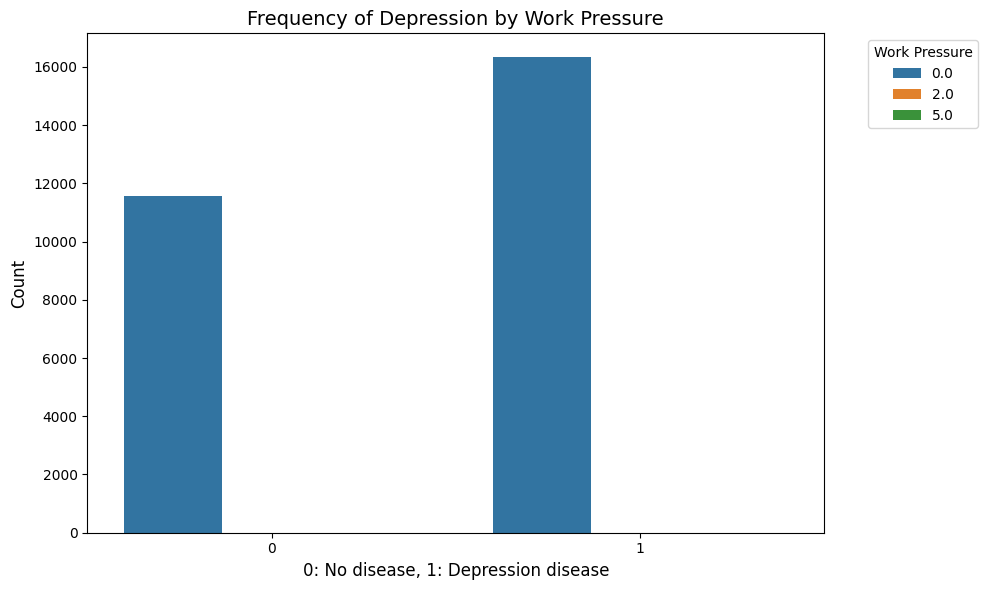

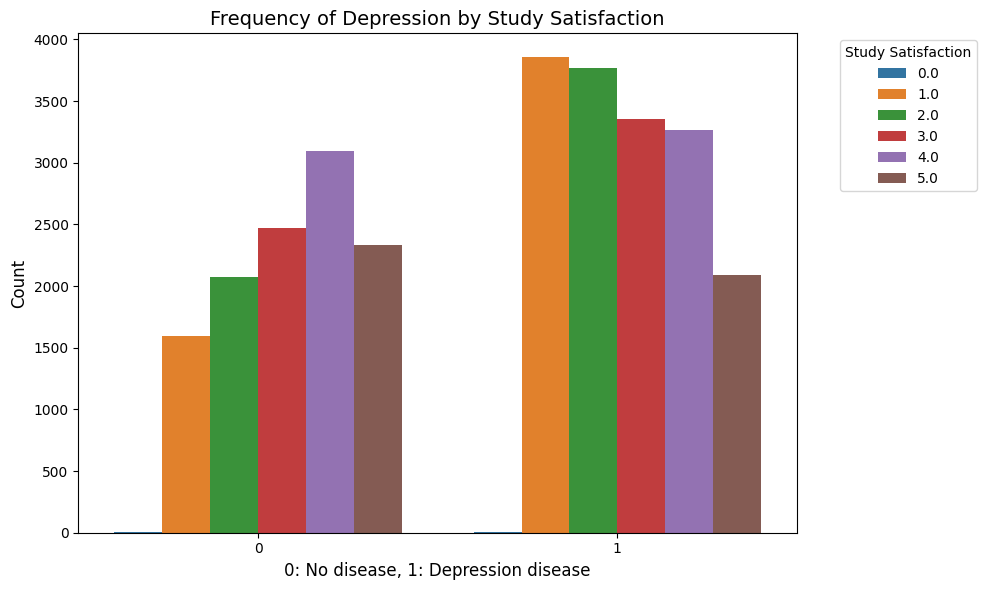

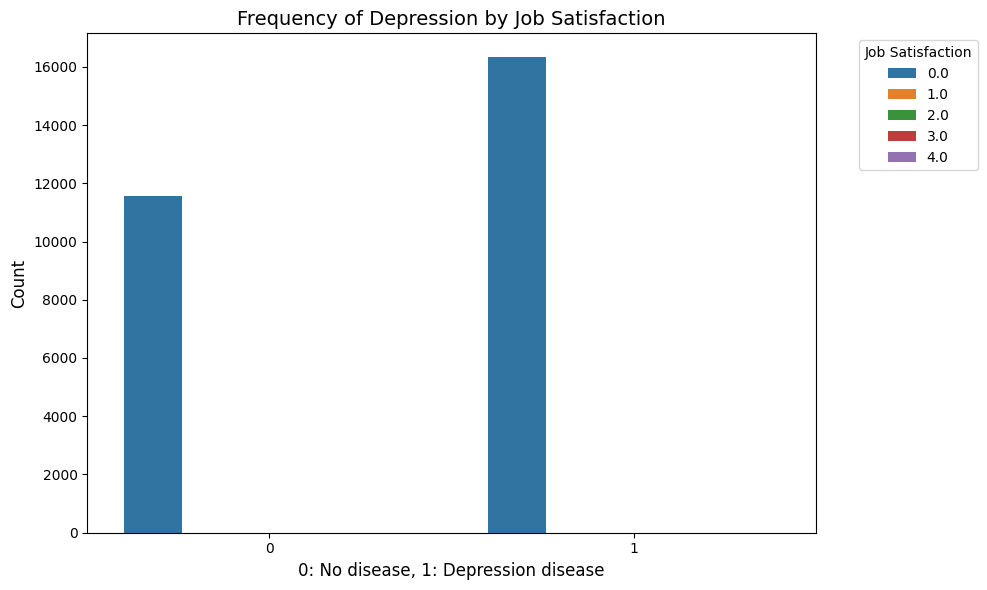

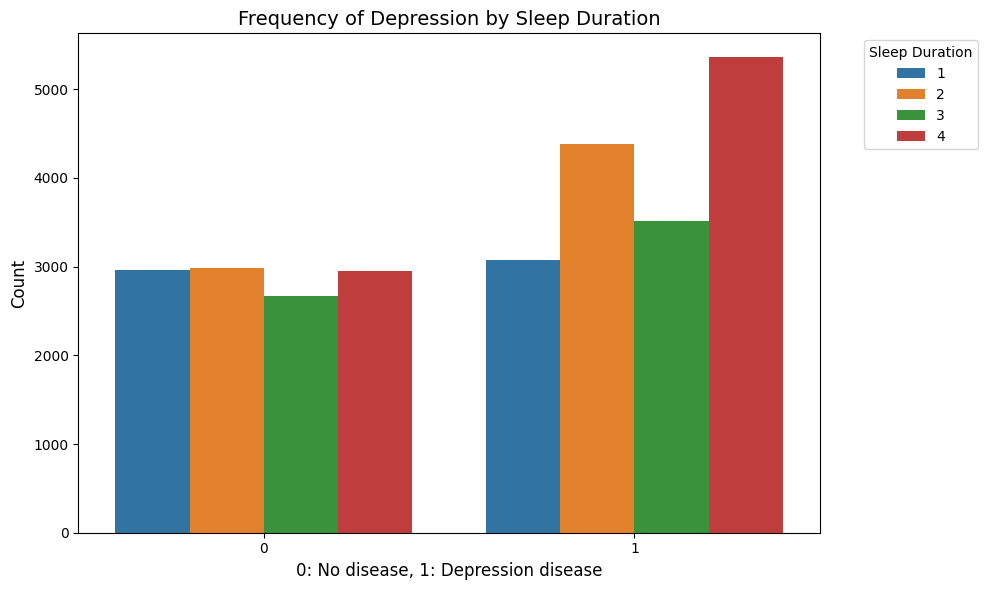

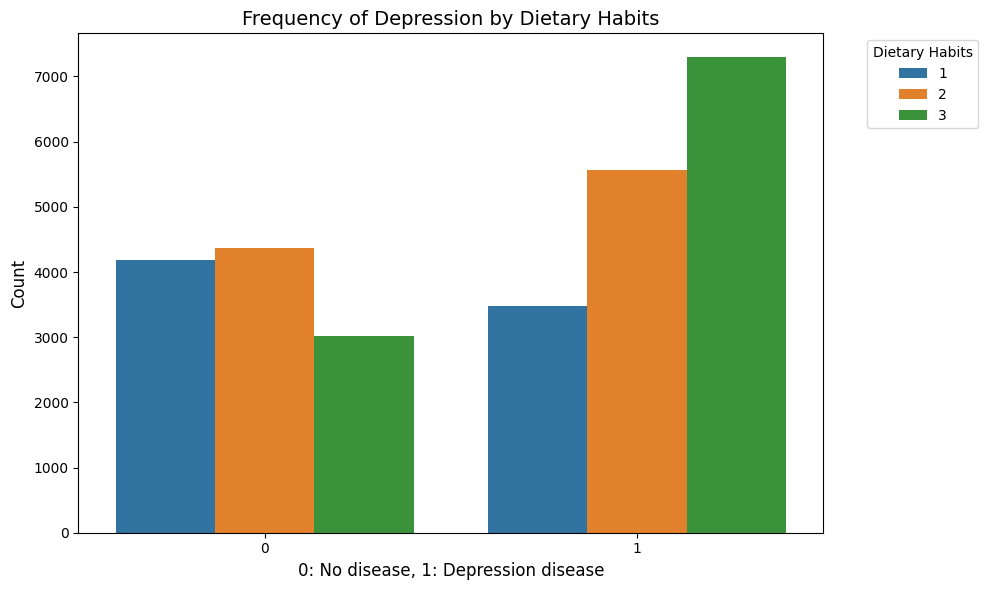

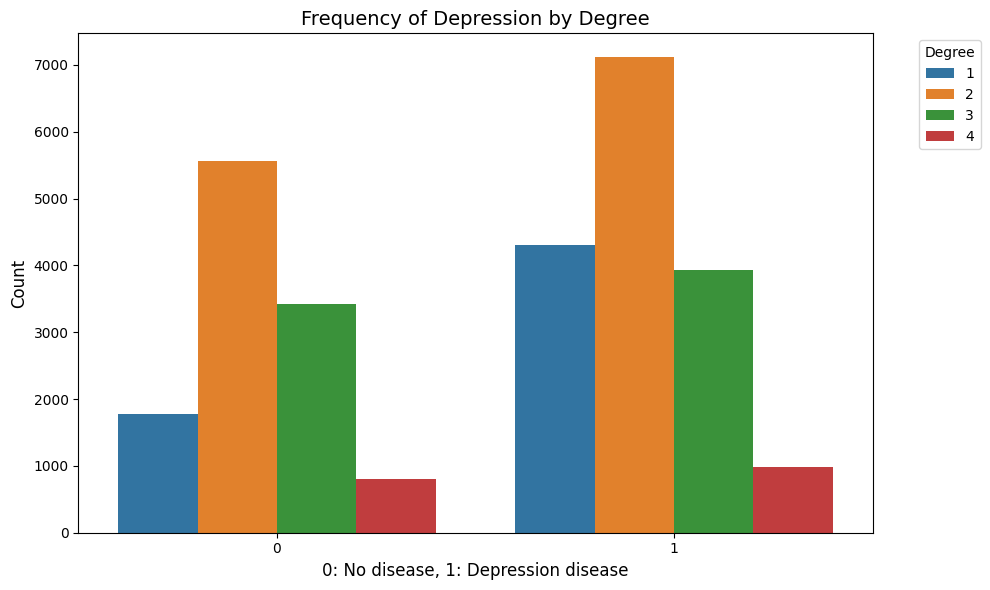

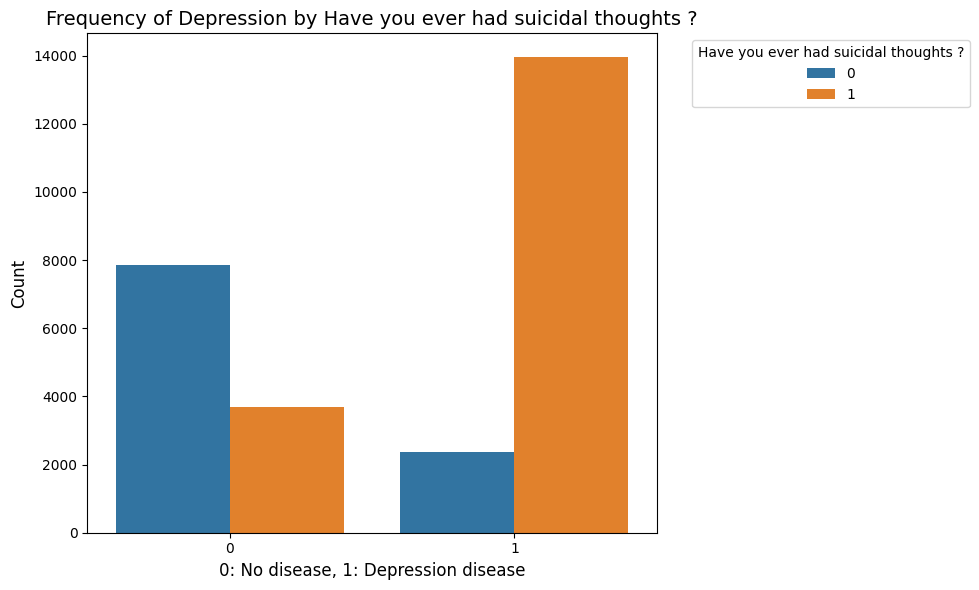

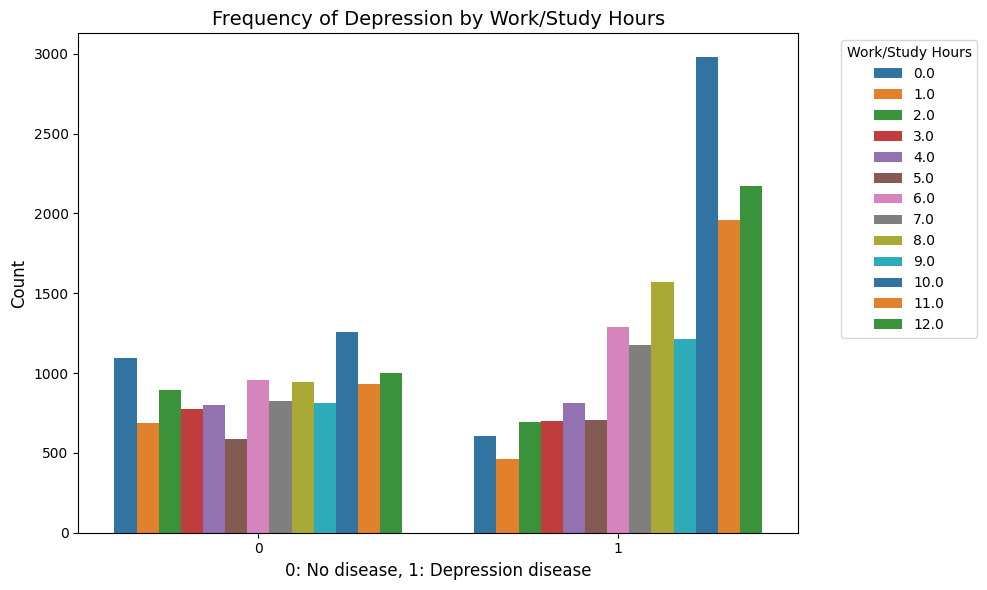

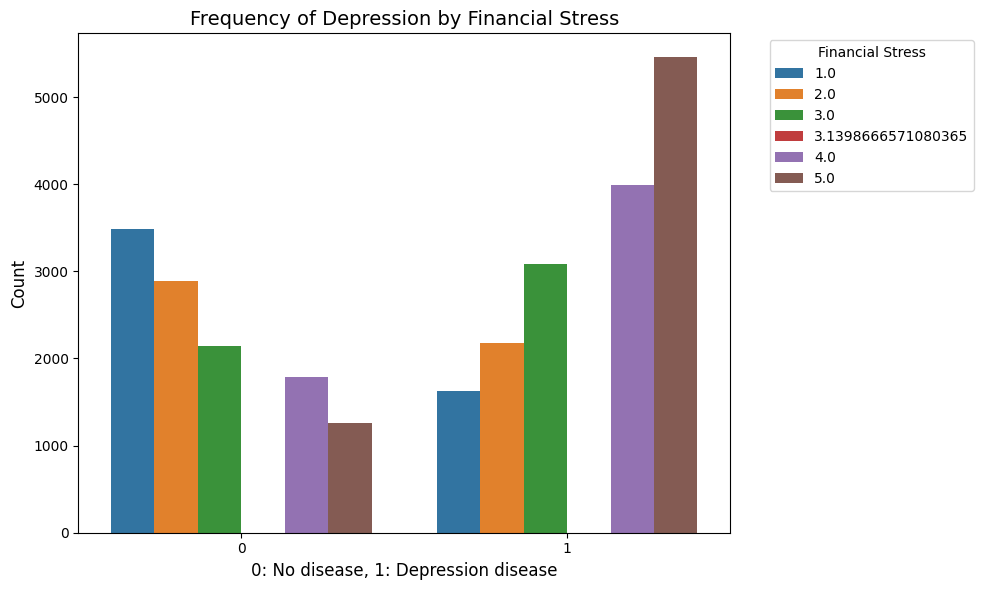

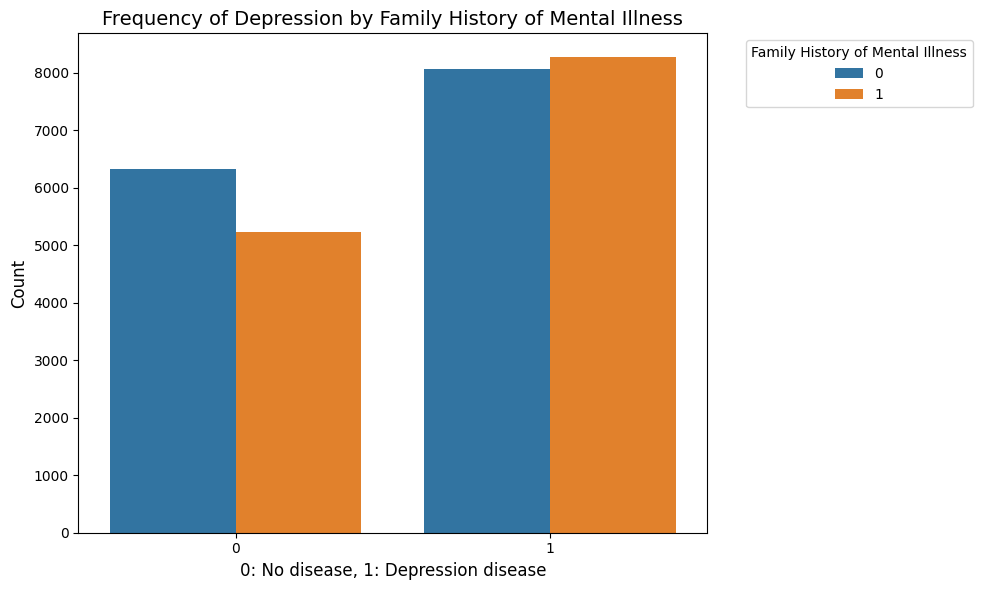

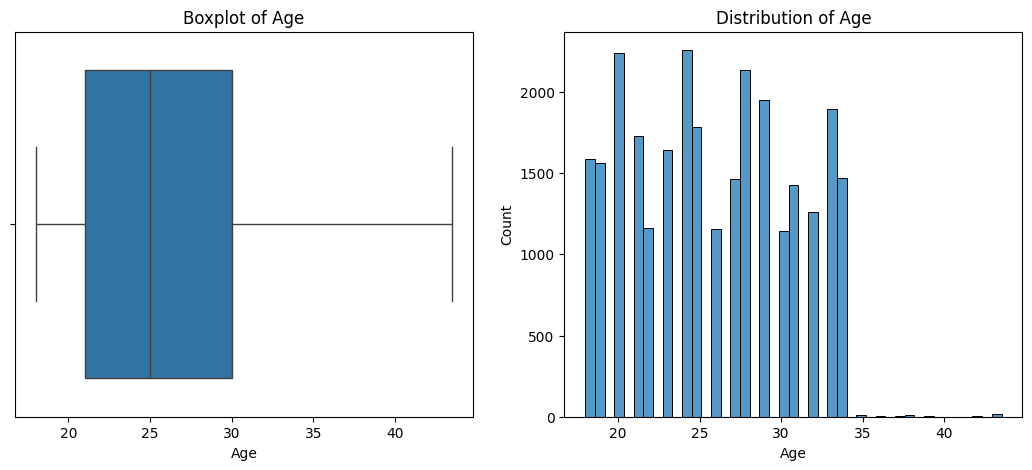

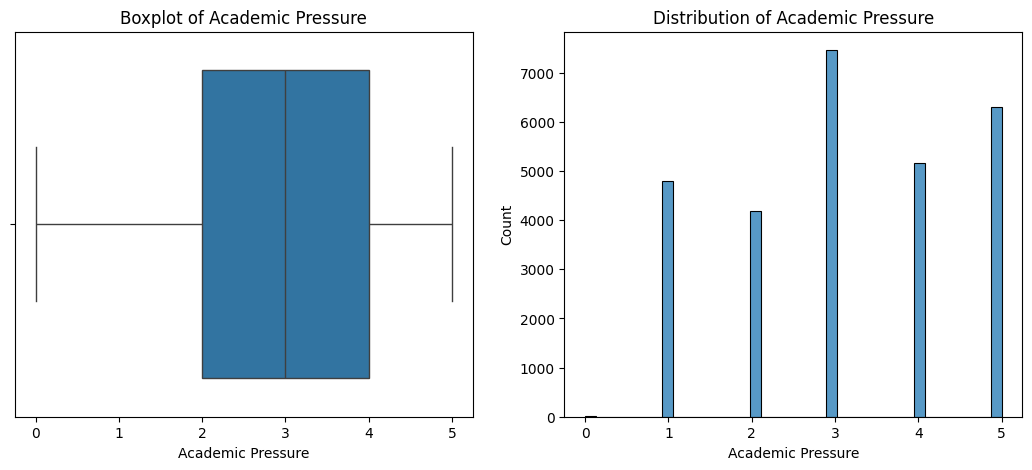

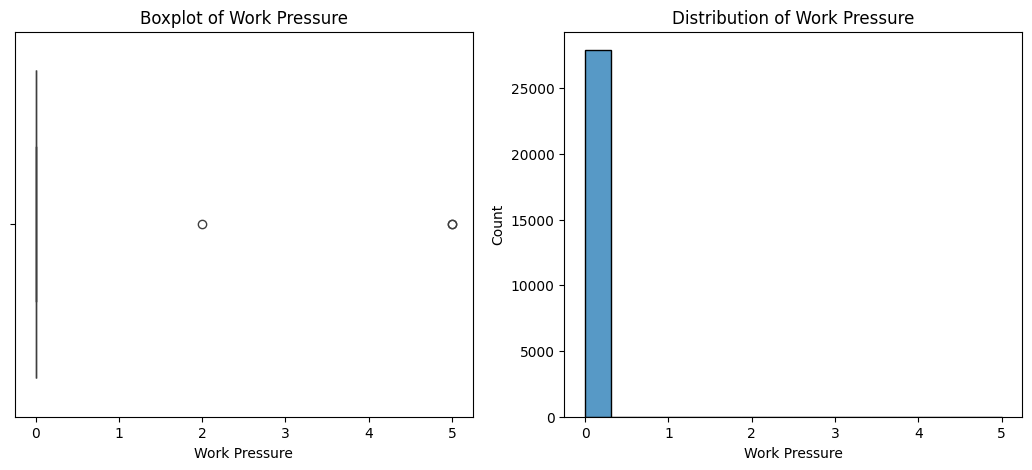

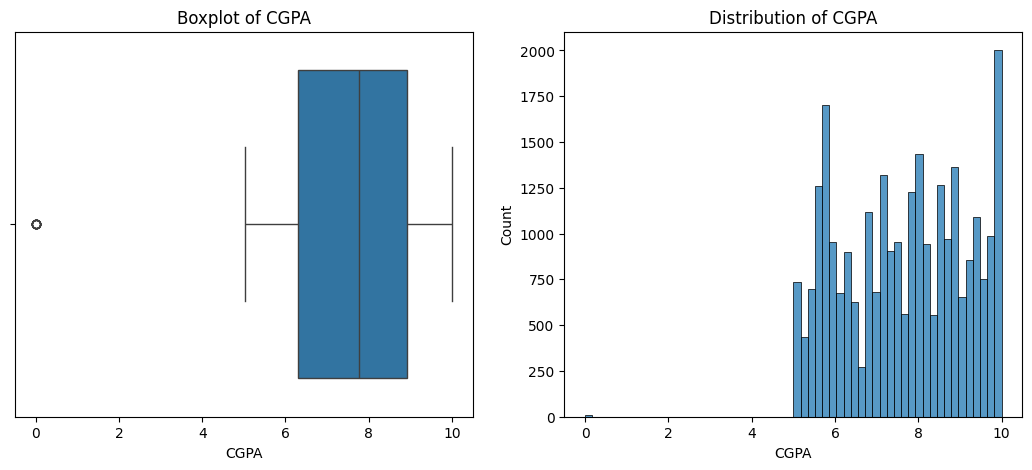

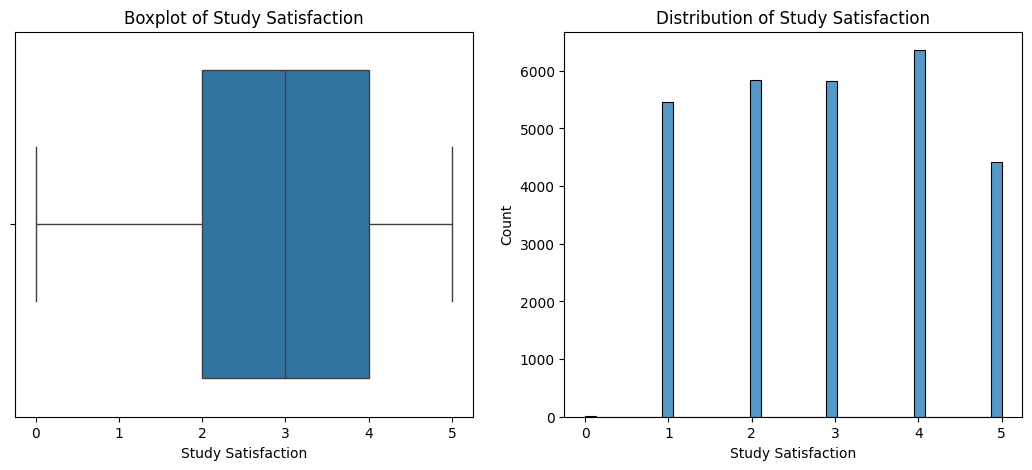

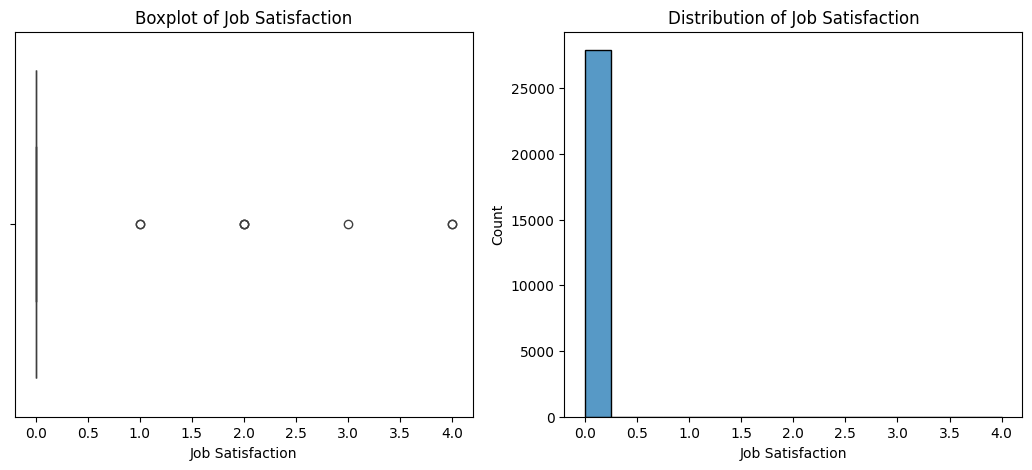

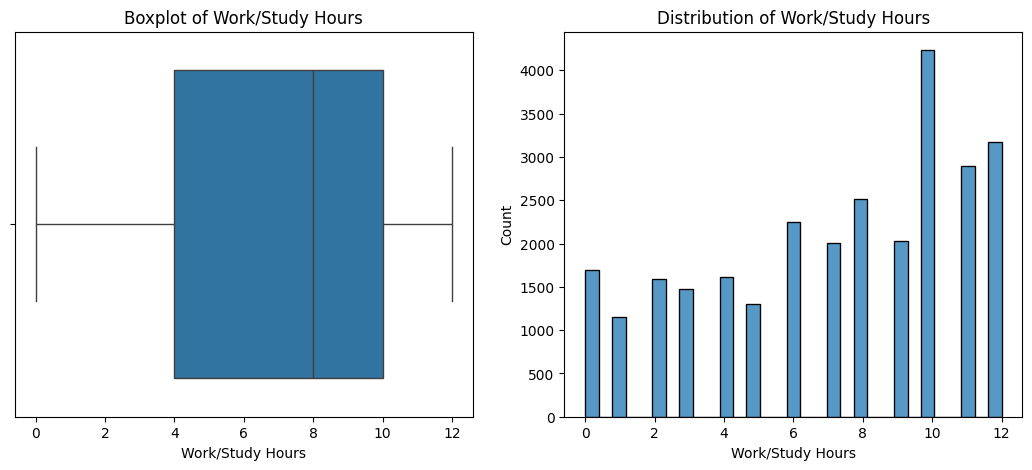

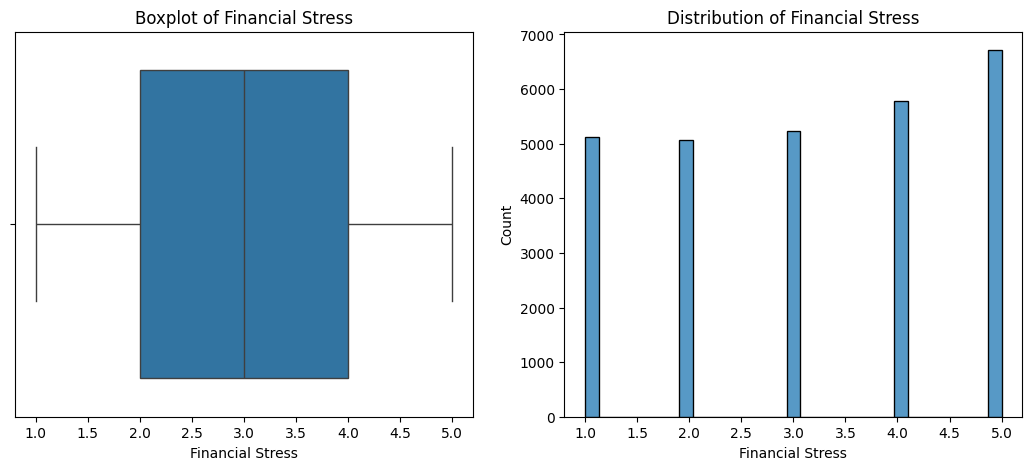

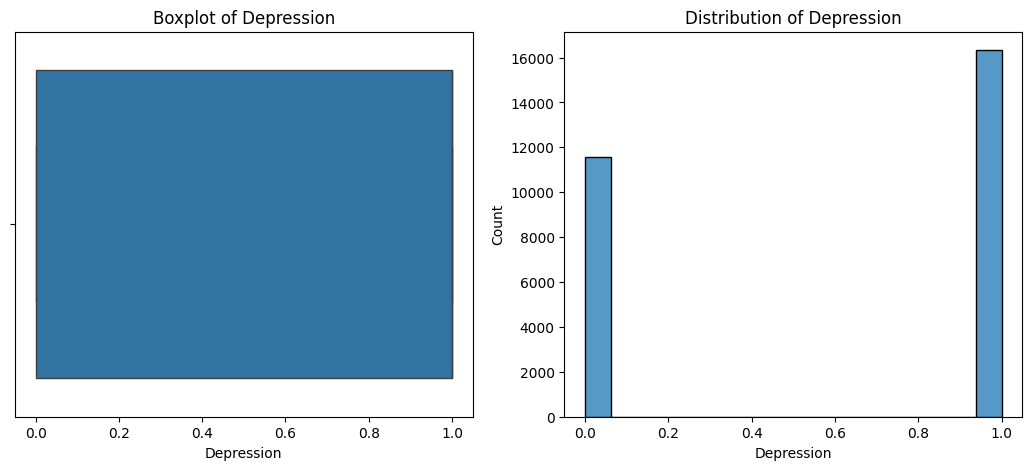

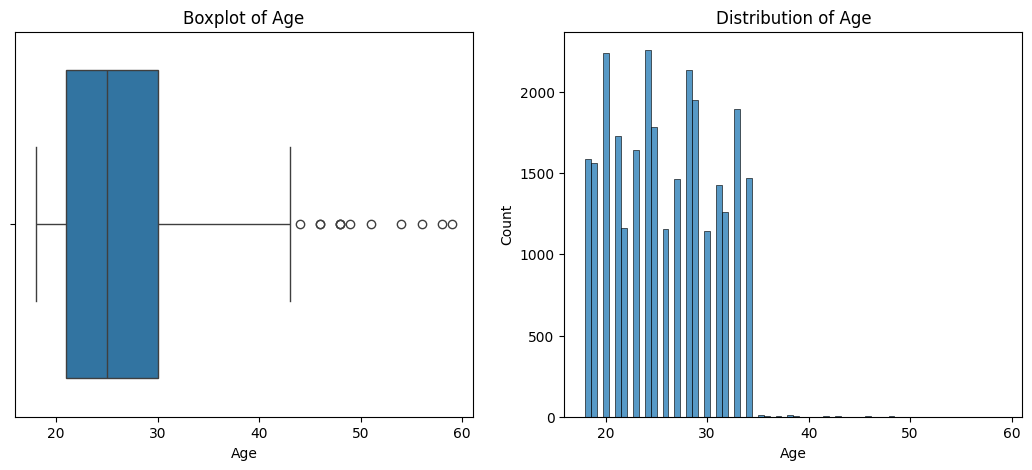

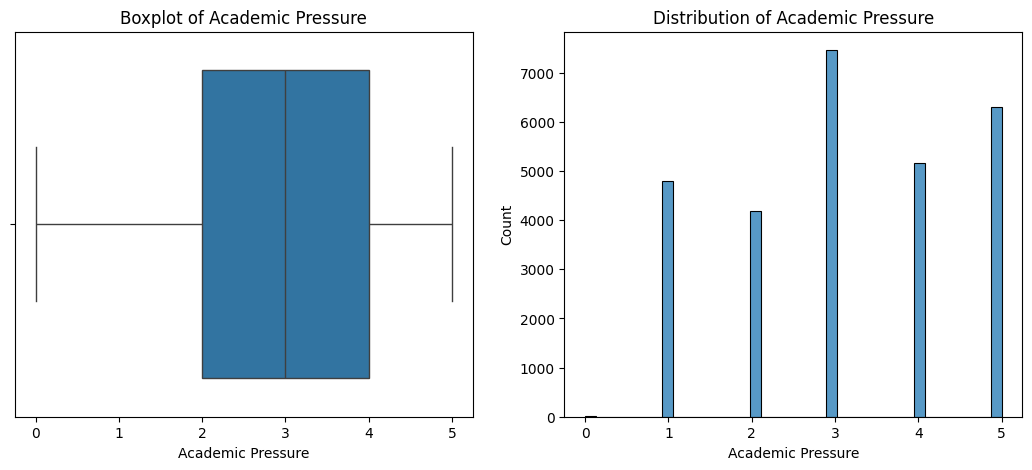

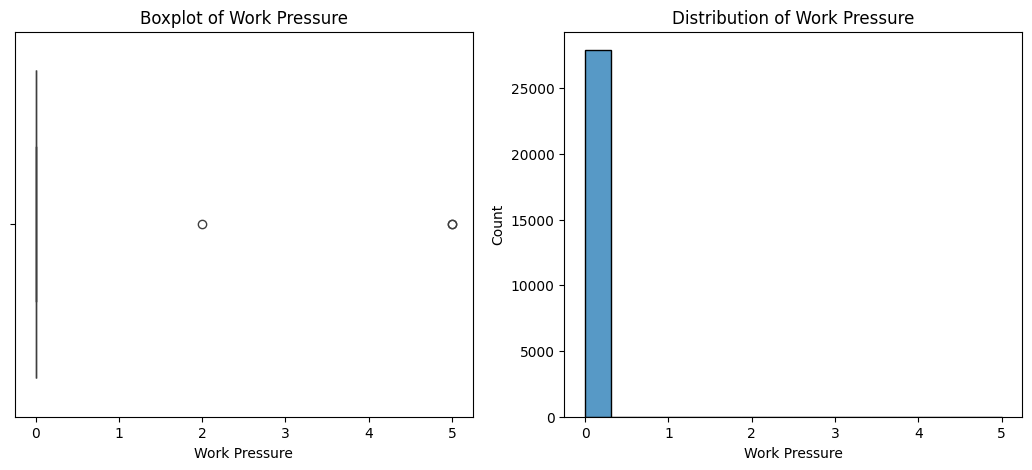

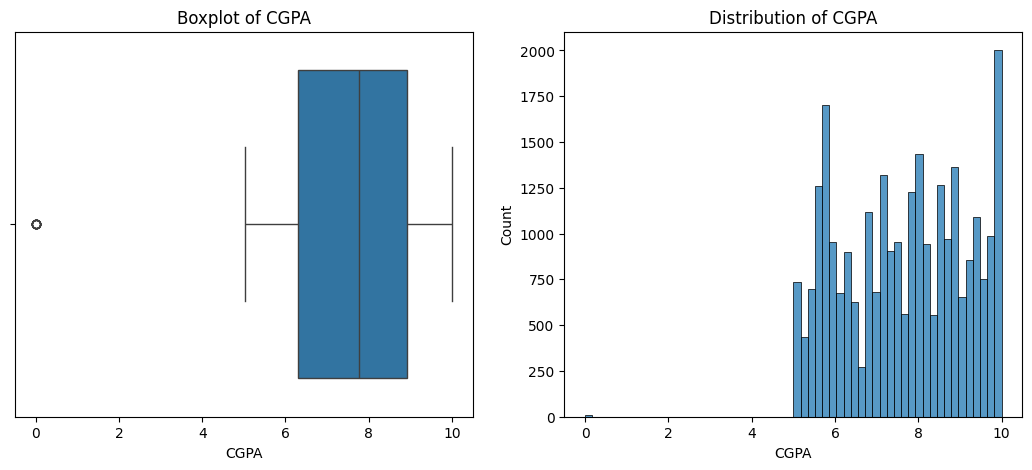

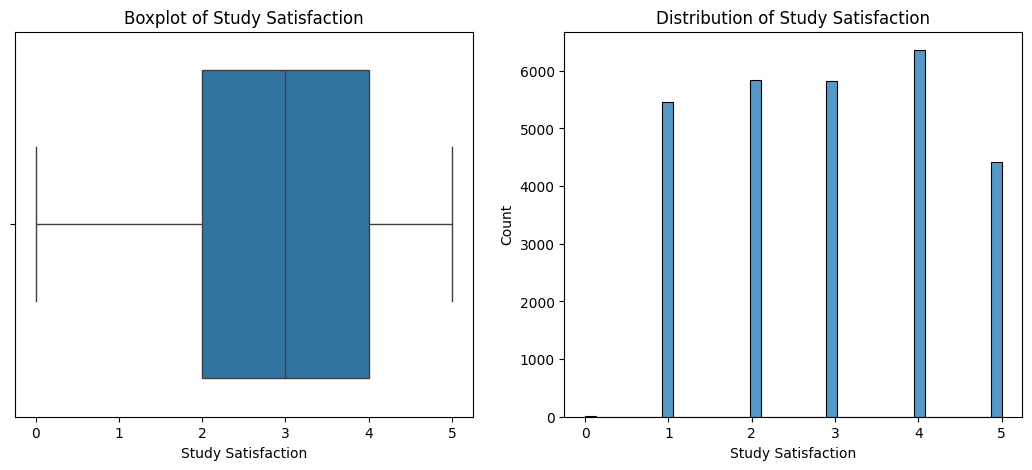

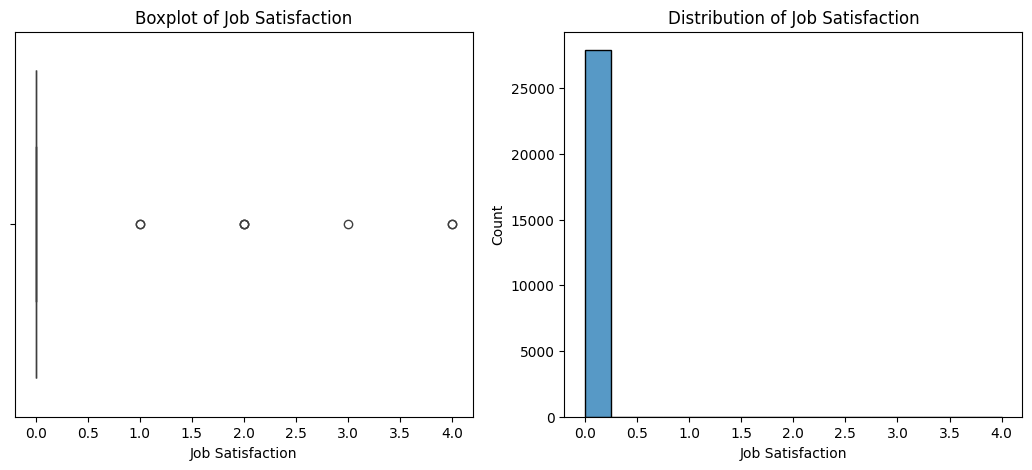

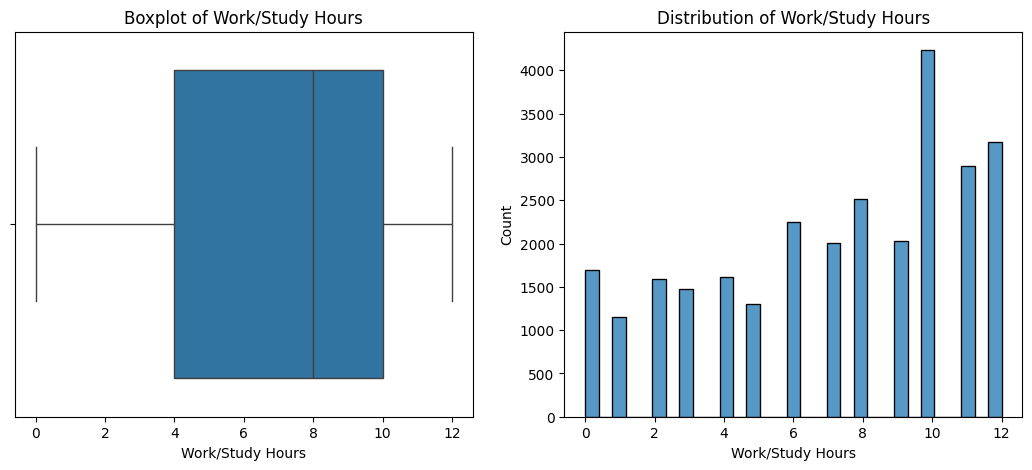

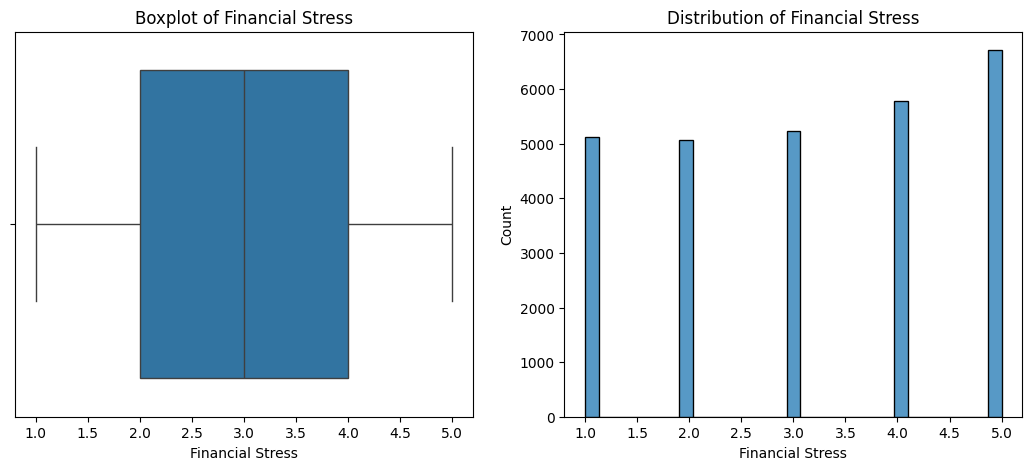

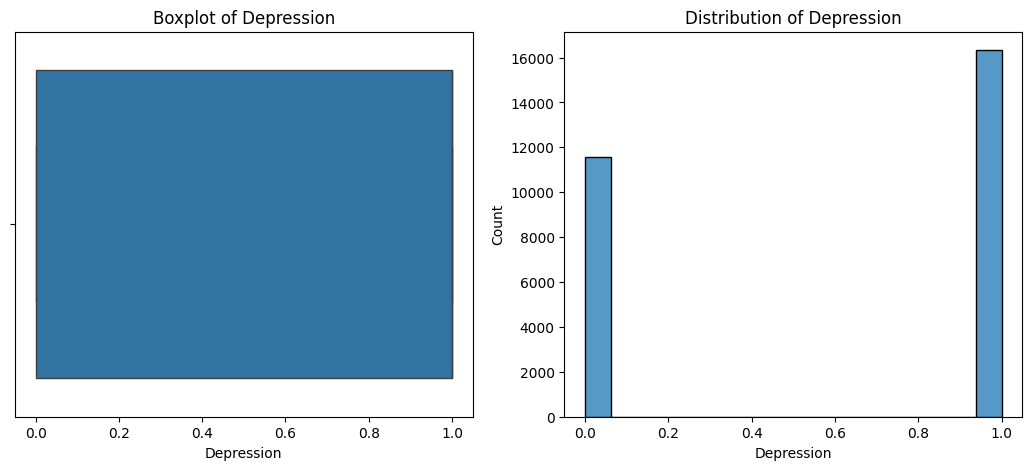

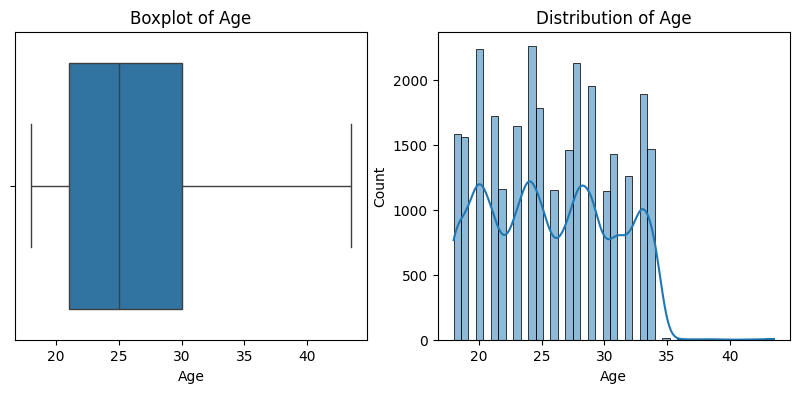

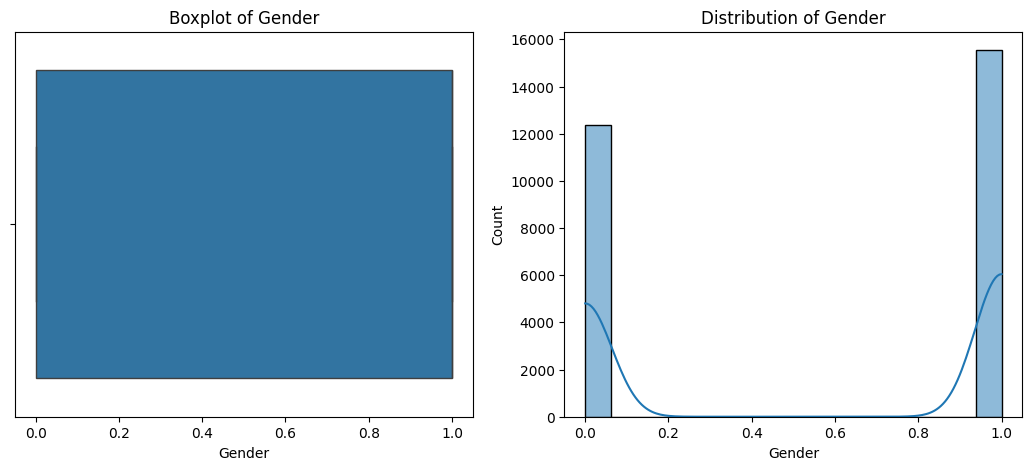

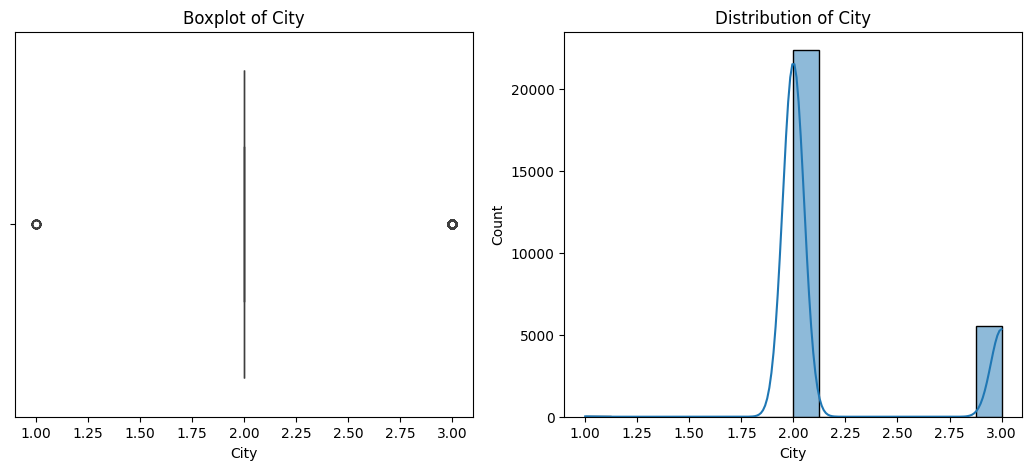

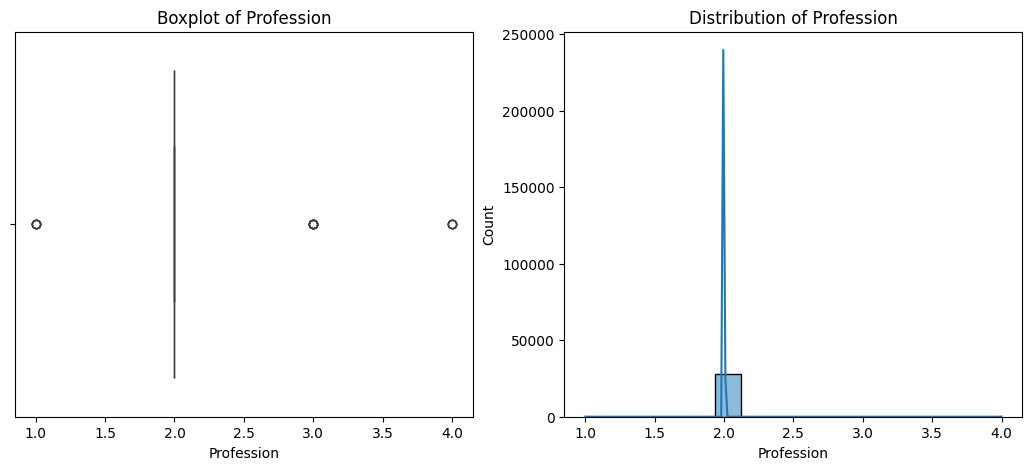

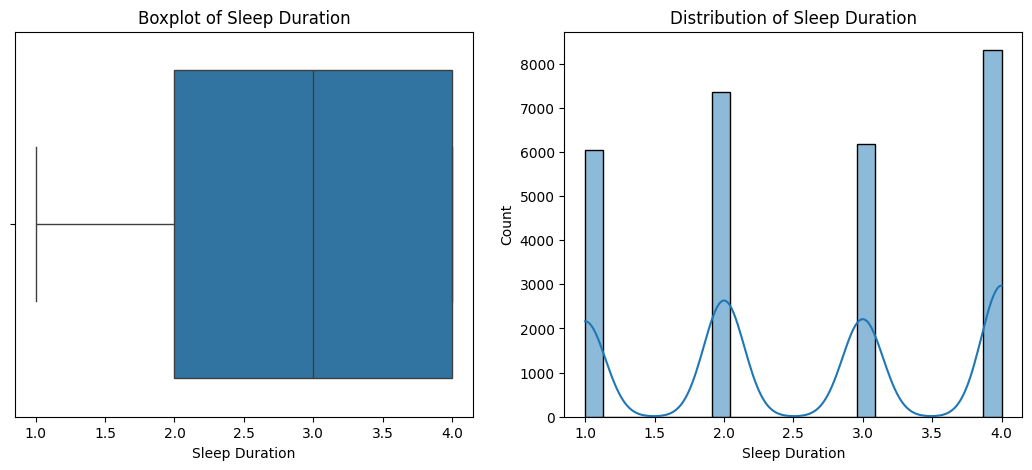

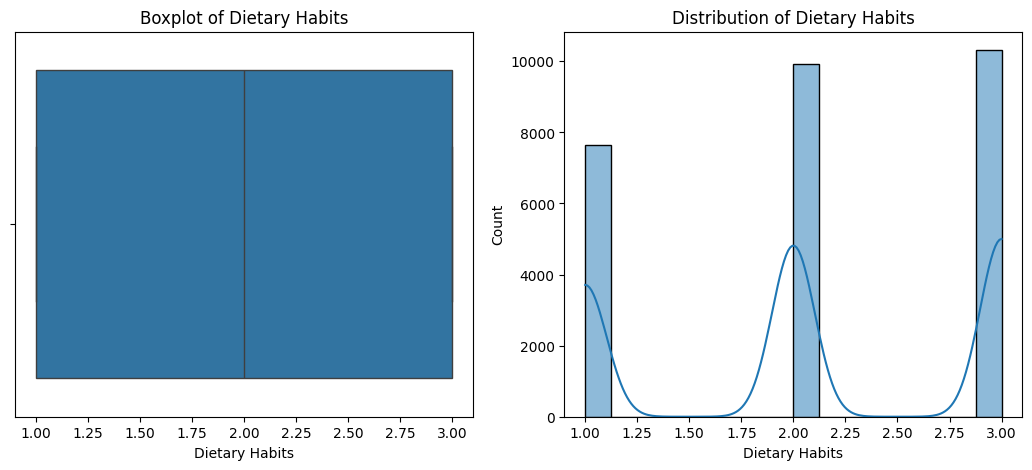

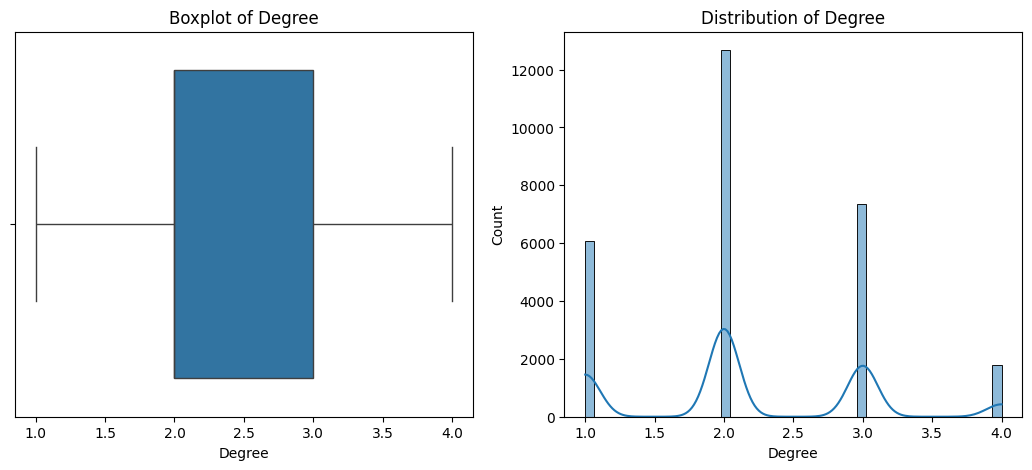

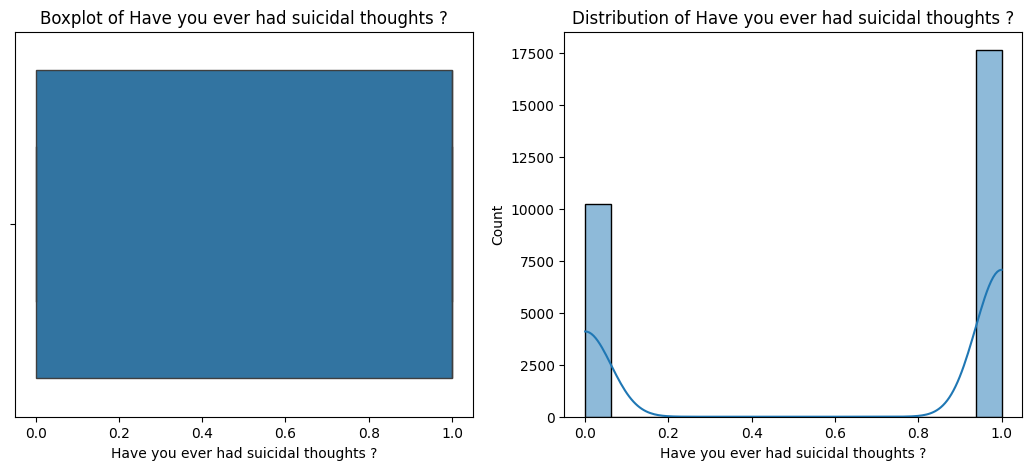

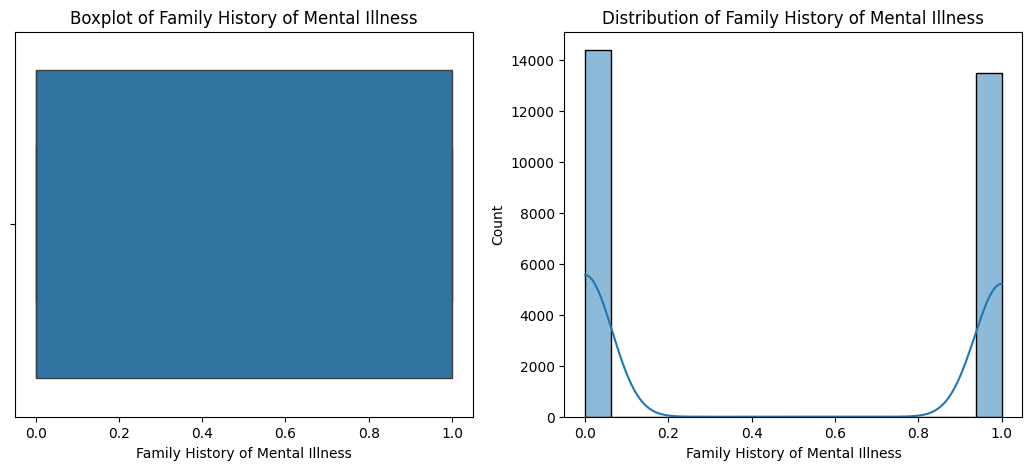

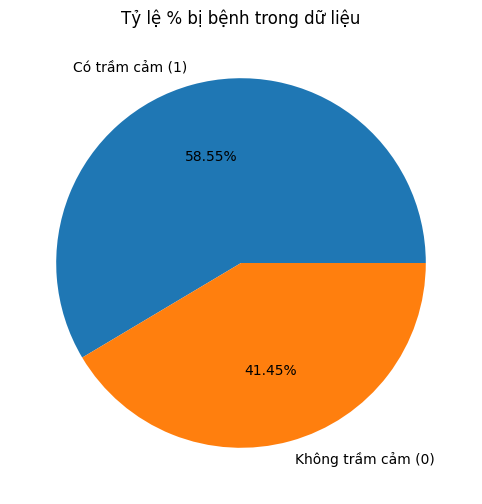

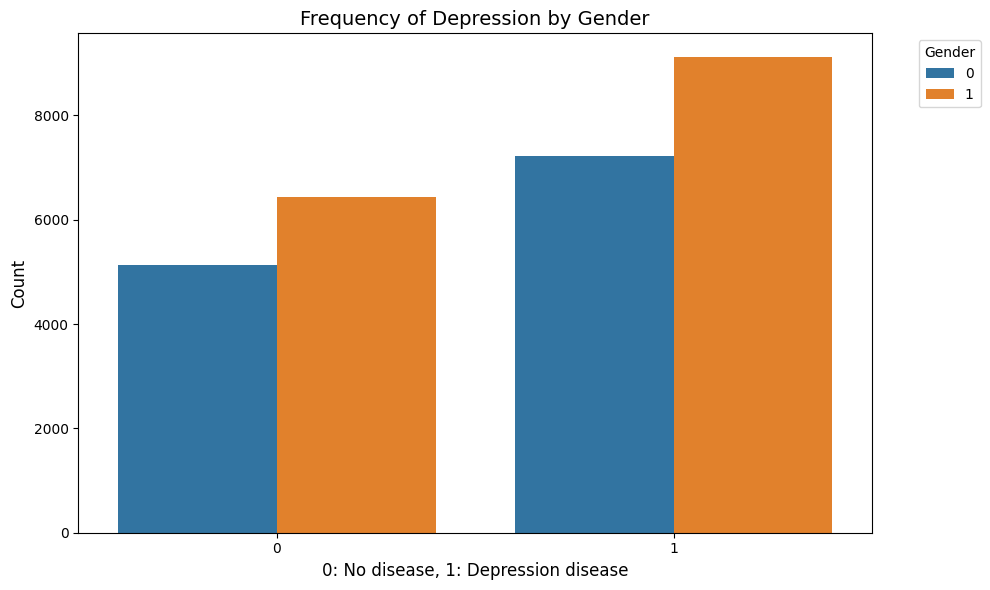

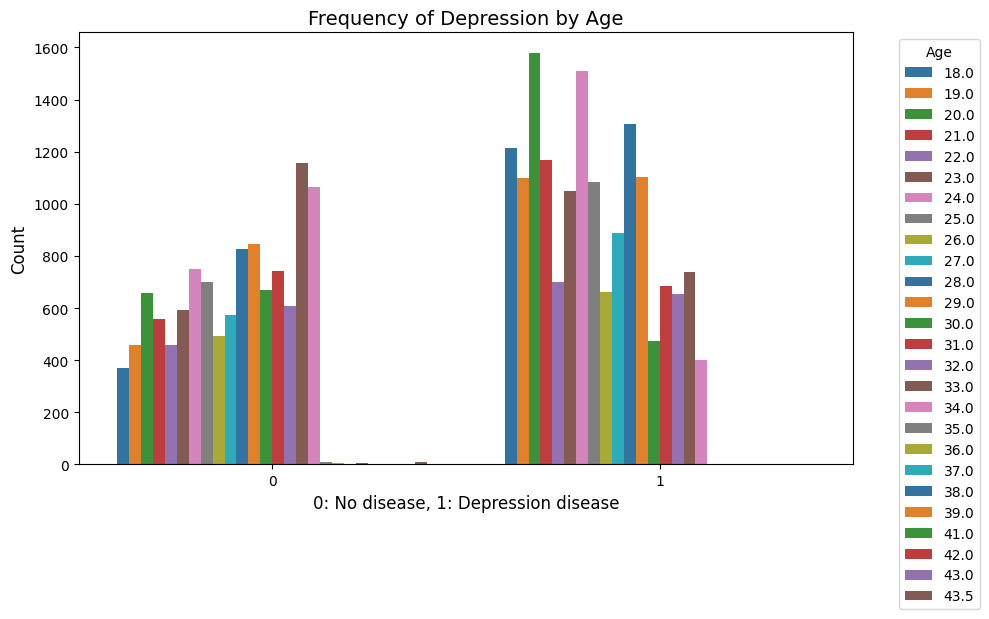

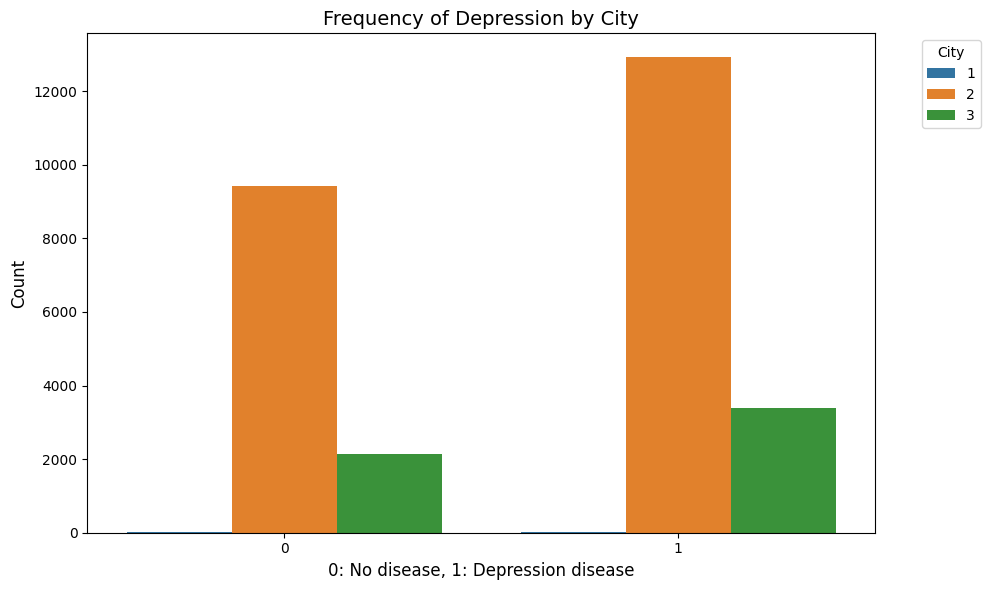

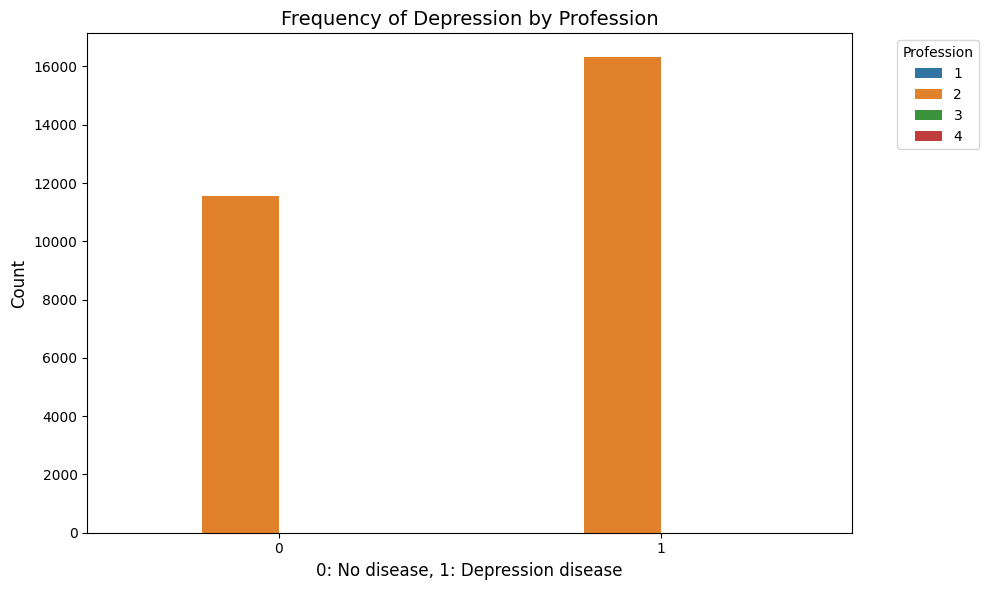

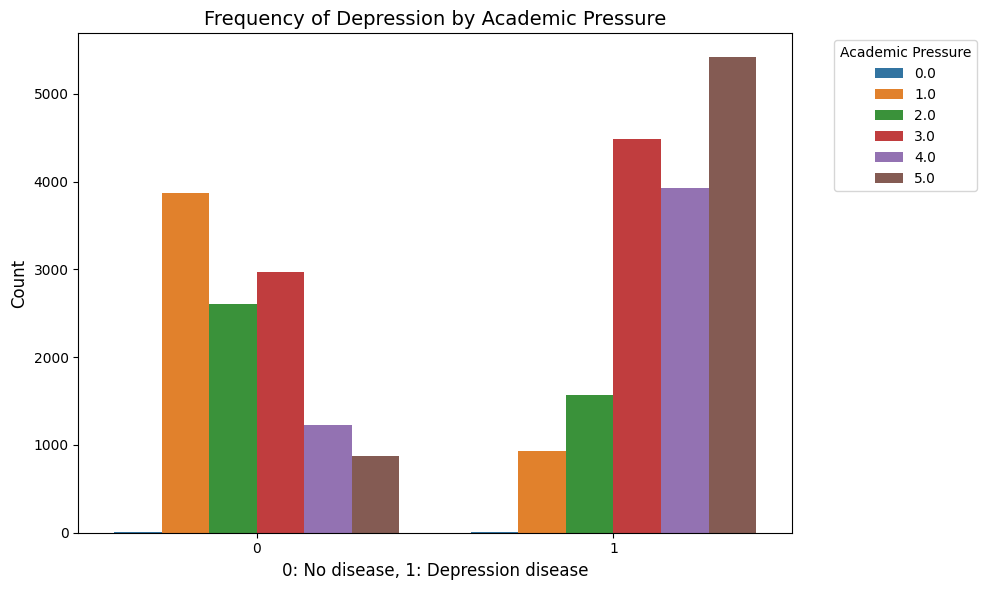

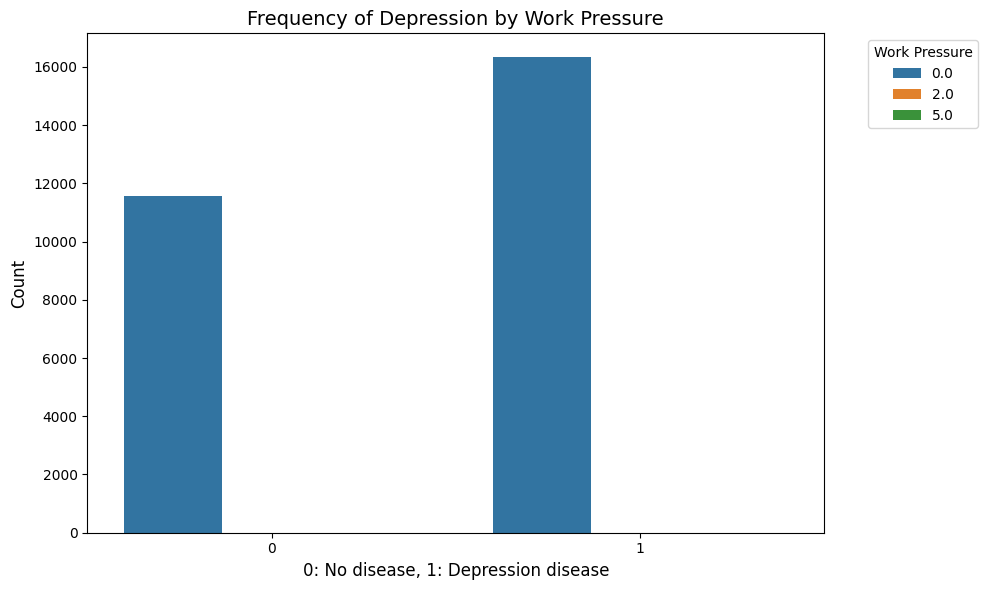

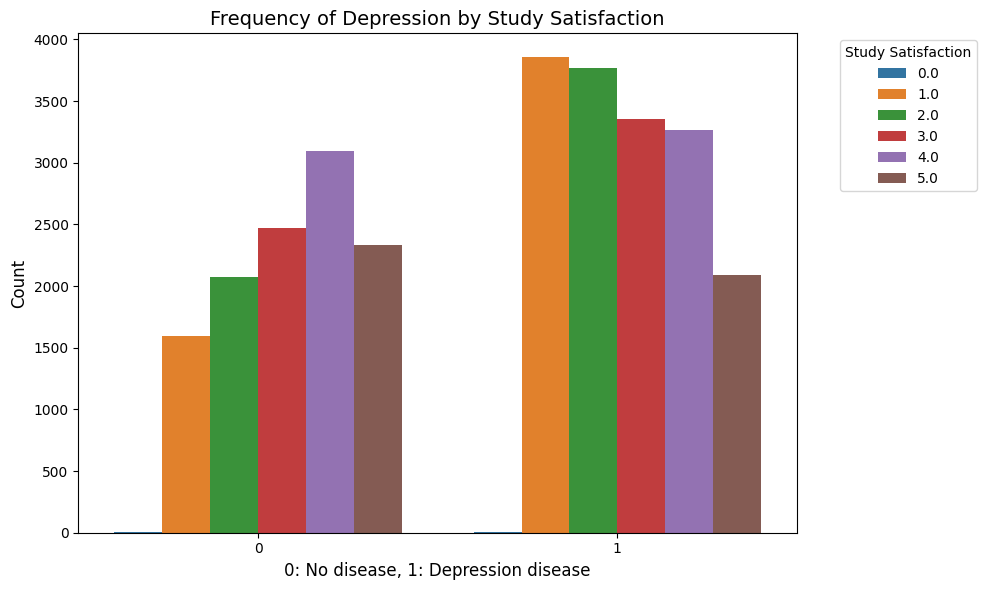

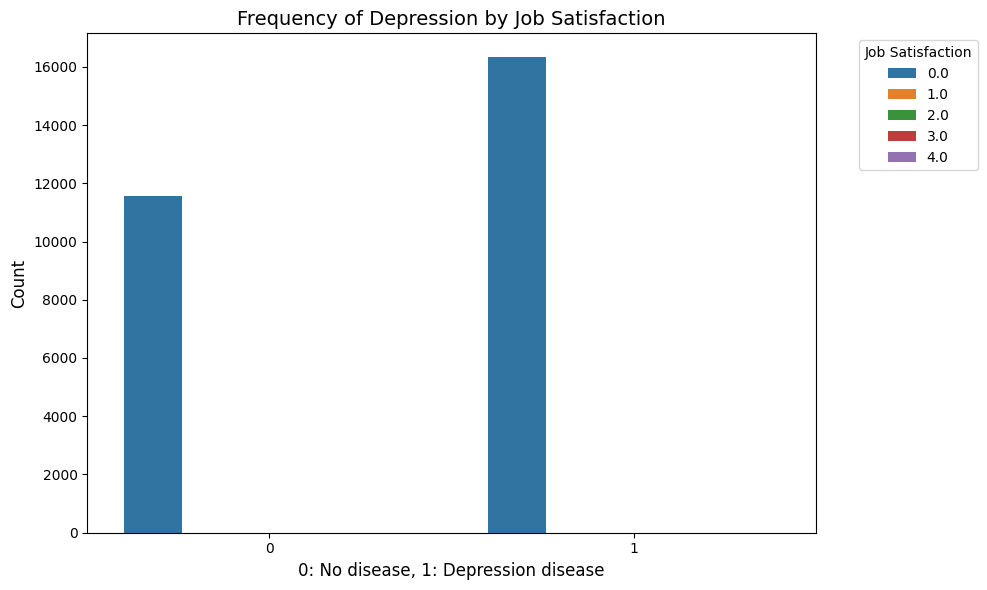

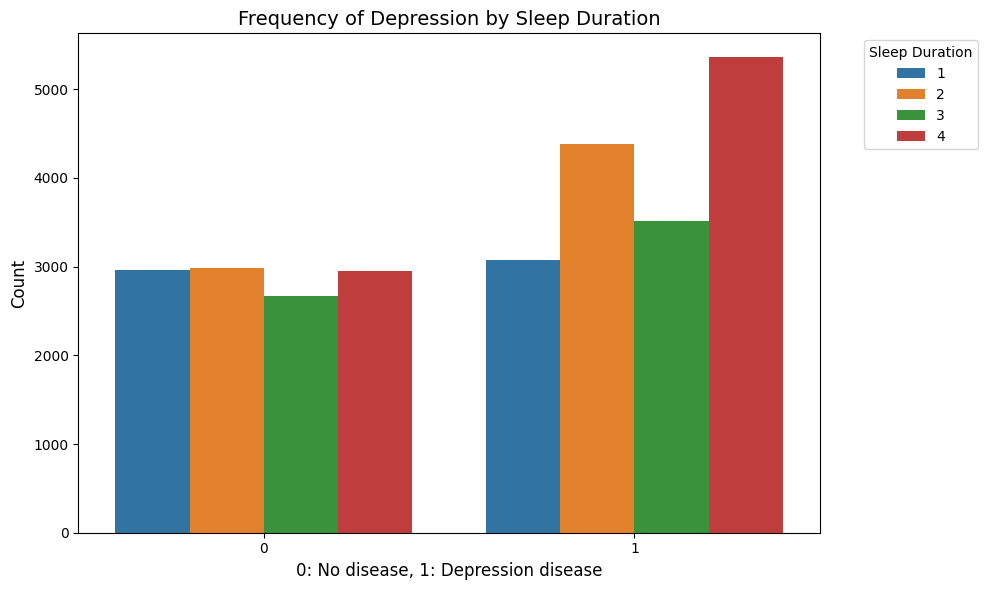

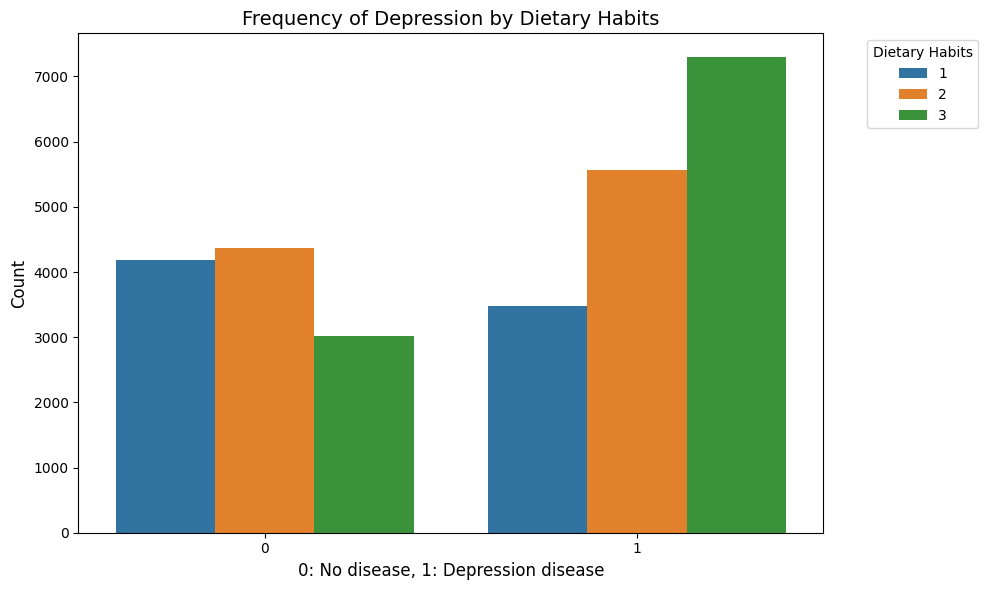

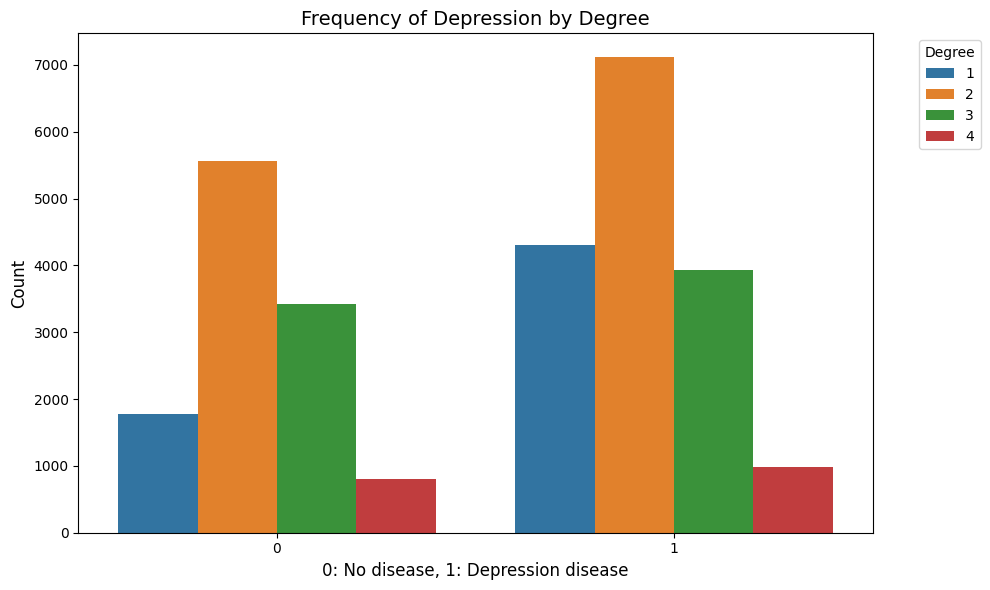

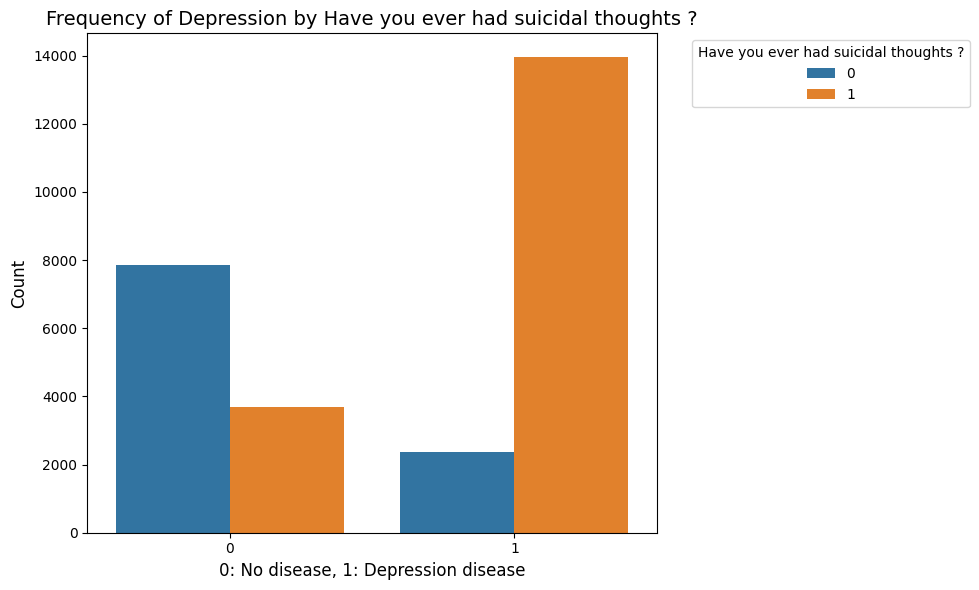

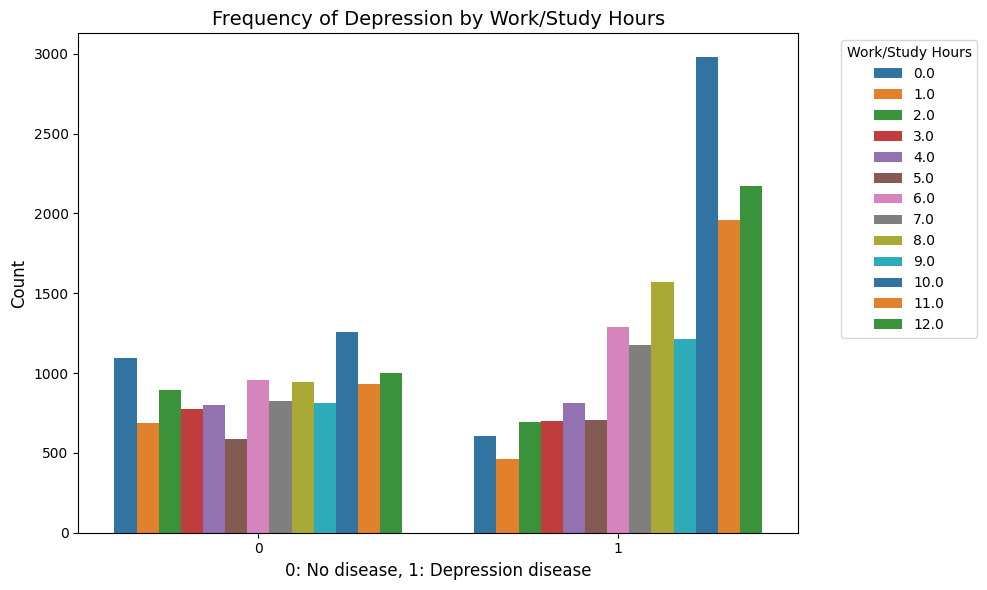

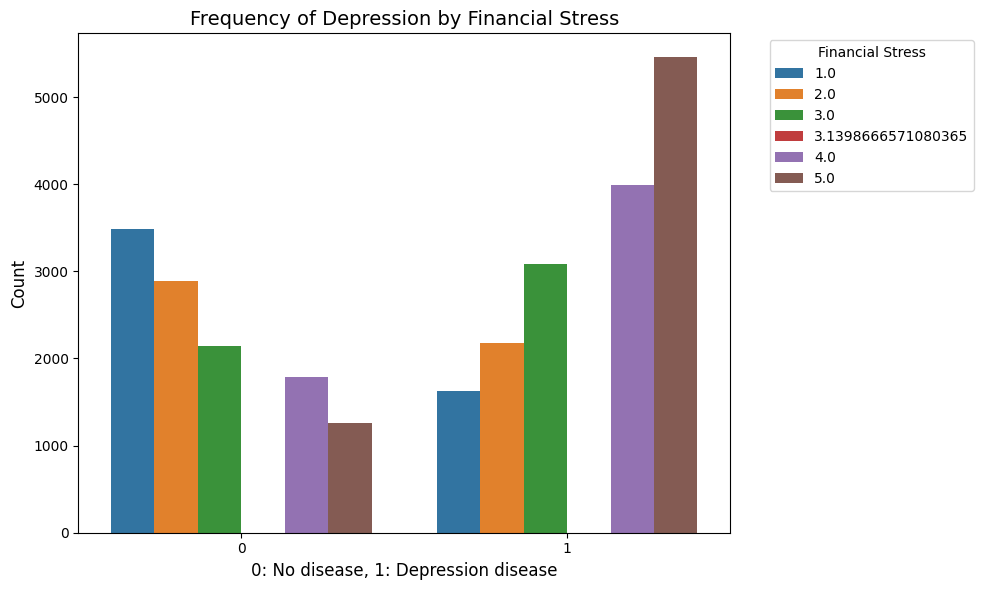

In [ ]:
for col in df_num:   
    plt.figure(figsize=(13, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')


    plt.subplot(1, 2, 2)
    sns.histplot(df[col], kde=False)
    plt.title(f'Distribution of {col}')

    plt.show()

In [57]:
#Đưa dữ liệu về biên (dùng capping)
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Ngưỡng bên trái: {lower_bound}")
print(f"Ngưỡng bên phải: {upper_bound}")
df['Age'] = df['Age'].clip(lower=lower_bound, upper=upper_bound)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'])
plt.title(f'Boxplot of Age')

plt.subplot(1, 2, 2)
sns.histplot(df['Age'], kde=True)
plt.title(f'Distribution of Age')

plt.show()

Ngưỡng bên trái: 7.5
Ngưỡng bên phải: 43.5


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11540\3764081885.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [58]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [59]:
replace_gen = {
    'Male': 1,
    'Female': 0
}
df['Gender'] = df['Gender'].replace(replace_gen)
df['Gender'].unique()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11540\1347889223.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace(replace_gen)


array([1, 0])

In [60]:
print(df['City'].value_counts())


City
Kalyan                1570
Srinagar              1372
Hyderabad             1340
Vasai-Virar           1290
Lucknow               1155
Thane                 1139
Ludhiana              1111
Agra                  1094
Surat                 1078
Kolkata               1066
Jaipur                1036
Patna                 1007
Visakhapatnam          969
Pune                   968
Ahmedabad              951
Bhopal                 934
Chennai                885
Meerut                 825
Rajkot                 816
Delhi                  768
Bangalore              767
Ghaziabad              745
Mumbai                 699
Vadodara               694
Varanasi               685
Nagpur                 651
Indore                 643
Kanpur                 609
Nashik                 547
Faridabad              461
Saanvi                   2
Bhavna                   2
City                     2
Harsha                   2
Less Delhi               1
M.Tech                   1
3.0                    

In [61]:
df['City'].unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi', 'Saanvi', 'M.Tech', 'Bhavna', 'Less Delhi',
       'City', '3.0', 'Less than 5 Kalyan', 'Mira', 'Harsha', 'Vaanya',
       'Gaurav', 'Harsh', 'Reyansh', 'Kibara', 'Rashi', 'ME', 'M.Com',
       'Nalyan', 'Mihir', 'Nalini', 'Nandini', 'Khaziabad'], dtype=object)

In [62]:
# Sửa các lỗi hiển nhiên để tăng độ chính xác
replace_dict = {
    'Khaziabad': 'Ghaziabad',
    'Nalyan': 'Kalyan',
    'Less Delhi': 'Delhi',
    'Less than 5 Kalyan': 'Kalyan'
}
df['City'] = df['City'].replace(replace_dict)

# Gom các thành phố < 200 mẫu vào nhóm 'Other'
city_counts = df['City'].value_counts()
df['City'] = df['City'].apply(lambda x: x if city_counts[x] >= 200 else 'Other')
df['City'].unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi', 'Other'], dtype=object)

In [63]:
# Danh sách các siêu đô thị (Tier 1)
c1 = ['Delhi', 'Mumbai', 'Bangalore', 'Chennai', 'Hyderabad', 'Kolkata']

# Hàm phân loại
def classification_city(city):
    if city in c1:
        return 3  # Áp lực cao 
    elif city == 'Other':
        return 1  # Áp lực thấp
    else:
        return 2  # Các thành phố lớn còn lại

# Áp dụng vào cột City
df['City'] = df['City'].apply(classification_city)
df['City'].unique()

array([2, 3, 1])

In [64]:
df['Profession'].unique()

array(['Student', 'Civil Engineer', 'Architect', 'UX/UI Designer',
       'Digital Marketer', 'Content Writer', 'Educational Consultant',
       'Teacher', 'Manager', 'Chef', 'Doctor', 'Lawyer', 'Entrepreneur',
       'Pharmacist'], dtype=object)

In [65]:
replace_prof = {
    # 1: Thời gian linh hoạt
    'Content Writer': 1, 'Chef': 1, 'Educational Consultant': 1,
    # 2: Áp lực trung bình
    'Student': 2, 'Architect': 2, 'UX/UI Designer': 2, 'Teacher': 2,
    # 3: Áp lực cao
    'Civil Engineer': 3, 'Digital Marketer': 3, 'Manager': 3, 'Pharmacist': 3,
    # 4: Áp lực và rủi rõ cao
    'Doctor': 4, 'Lawyer': 4, 'Entrepreneur': 4
}

df['Profession'] = df['Profession'].replace(replace_prof)
df['Profession'].unique()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11540\3196272218.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Profession'] = df['Profession'].replace(replace_prof)


array([2, 3, 1, 4])

In [66]:
df['Sleep Duration'].unique()

array(['5-6 hours', 'Less than 5 hours', '7-8 hours', 'More than 8 hours',
       'Others'], dtype=object)

In [67]:
replace_sleep = {
    'Less than 5 hours': 4,
    '5-6 hours': 3,
    '7-8 hours': 2,
    'More than 8 hours': 1,
    'Others': 2
}
df['Sleep Duration'] = df['Sleep Duration'].replace(replace_sleep)
df['Sleep Duration'].unique()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11540\3915238276.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sleep Duration'] = df['Sleep Duration'].replace(replace_sleep)


array([3, 4, 2, 1])

In [68]:
df['Dietary Habits'].unique()

array(['Healthy', 'Moderate', 'Unhealthy', 'Others'], dtype=object)

In [69]:
replace_die = {
    'Healthy': 1,
    'Moderate': 2,
    'Unhealthy': 3,
    'Others': 2 
}
df['Dietary Habits'] = df['Dietary Habits'].replace(replace_die)
df['Dietary Habits'].unique()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11540\3826764334.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Dietary Habits'] = df['Dietary Habits'].replace(replace_die)


array([1, 2, 3])

In [70]:
df['Degree'].unique()

array(['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', 'Class 12', 'B.Ed',
       'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA', 'B.Com',
       'MD', 'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech', 'BBA',
       'ME', 'MHM', 'Others'], dtype=object)

In [71]:
degree_mapping = {
    # 1: Phổ thông 
    'Class 12': 1,
    # 2: Cử nhân 
    'BSc': 2, 'BA': 2, 'BCA': 2, 'B.Ed': 2, 'BE': 2, 'B.Com': 2, 'BBA': 2, 'B.Tech': 2, 'B.Arch': 2, 'BHM': 2, 'LLB': 2, 'B.Pharm': 2,
    # 3: Thạc sĩ 
    'MSc': 3, 'MA': 3, 'MCA': 3, 'M.Tech': 3, 'MBA': 3, 'M.Ed': 3, 'M.Com': 3, 'LLM': 3, 'M.Pharm': 3, 'ME': 3, 'MHM': 3,
    # 4: Tiến sĩ
    'PhD': 4, 'MD': 4, 'MBBS': 4,
    'Others': 2
}
df['Degree'] = df['Degree'].replace(degree_mapping)
df['Degree'].unique()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11540\4294805064.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Degree'] = df['Degree'].replace(degree_mapping)


array([2, 3, 4, 1])

In [72]:
df['Have you ever had suicidal thoughts ?'].unique()

array(['Yes', 'No'], dtype=object)

In [73]:
replace_have = {
    'Yes':1,
    'No':0
}
df['Have you ever had suicidal thoughts ?']= df['Have you ever had suicidal thoughts ?'].replace(replace_have)
df['Have you ever had suicidal thoughts ?'].unique()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11540\2295756541.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Have you ever had suicidal thoughts ?']= df['Have you ever had suicidal thoughts ?'].replace(replace_have)


array([1, 0])

In [74]:
df['Family History of Mental Illness'].unique()

array(['No', 'Yes'], dtype=object)

In [75]:
replace_fami = {
    'Yes':1,
    'No':0
}
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].replace(replace_have)
df['Family History of Mental Illness'].unique()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11540\2250317692.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Family History of Mental Illness'] = df['Family History of Mental Illness'].replace(replace_have)


array([0, 1])

In [76]:
col_o = ['Gender','City','Profession', 'Sleep Duration', 'Dietary Habits', 'Degree','Have you ever had suicidal thoughts ?', 'Family History of Mental Illness' ]


In [77]:
for col in col_o:   
    plt.figure(figsize=(13, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')


    plt.subplot(1, 2, 2)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

    plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11540\2413214521.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11540\2413214521.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11540\2413214521.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11540\2413214521.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11540\2413214521.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11540\2413214521.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\Administrator

In [78]:
counts = df['Depression'].value_counts()
labels = ['Có trầm cảm (1)', 'Không trầm cảm (0)']

plt.figure(figsize=(8, 6))
plt.pie(counts, 
        labels=labels, 
        autopct='%1.2f%%'
)

plt.title('Tỷ lệ % bị bệnh trong dữ liệu')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11540\3179329074.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [79]:
df.describe()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,0.557220,25.819254,2.197269,2.000358,3.141214,0.000430,7.656104,2.943837,0.000681,2.600659,2.095552,2.174080,0.632809,7.156984,3.139867,0.483961,0.585499
std,0.496724,4.891484,0.399921,0.031677,1.381465,0.043992,1.470707,1.361148,0.044394,1.126427,0.796796,0.841391,0.482048,3.707642,1.437269,0.499752,0.492645
min,0.000000,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,21.000000,2.000000,2.000000,2.000000,0.000000,6.290000,2.000000,0.000000,2.000000,1.000000,2.000000,0.000000,4.000000,2.000000,0.000000,0.000000
50%,1.000000,25.000000,2.000000,2.000000,3.000000,0.000000,7.770000,3.000000,0.000000,3.000000,2.000000,2.000000,1.000000,8.000000,3.000000,0.000000,1.000000
75%,1.000000,30.000000,2.000000,2.000000,4.000000,0.000000,8.920000,4.000000,0.000000,4.000000,3.000000,3.000000,1.000000,10.000000,4.000000,1.000000,1.000000
max,1.000000,43.500000,3.000000,4.000000,5.000000,5.000000,10.000000,5.000000,4.000000,4.000000,3.000000,4.000000,1.000000,12.000000,5.000000,1.000000,1.000000


Tương quan dữ liệu

In [80]:
features = [col for col in df.columns if col not in ['Depression', 'CGPA']]

for col in features:
    plt.figure(figsize=(10, 6))
    
    # Vẽ biểu đồ tần suất
    sns.countplot(data=df, x='Depression', hue=col, palette='tab10')
    plt.title(f'Frequency of Depression by {col}', fontsize=14)
    plt.xlabel('0: No disease, 1: Depression disease', fontsize=12)
    plt.ylabel('Count', fontsize=12)

    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11540\229439434.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11540\229439434.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11540\229439434.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11540\229439434.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11540\229439434.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11540\229439434.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\Administrator\AppDa

Huấn luyện

Chia dữ liệu

In [81]:
X = df.drop('Depression', axis=1) # Bỏ cột mục tiêu ra khỏi đầu vào
y = df['Depression']

# Chia 80% để học, 20% để kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
log_reg = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Huấn luyện
log_reg.fit(X_train, y_train)
knn.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [83]:
models = {
    "Logistic Regression": log_reg,
    "K-Nearest Neighbors": knn,
    "Random Forest": rf
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n===== {name} =====")
    print(f"Accuracy: {acc:.4f}")
    # Xem chi tiết Precision, Recall, F1-score cho từng lớp 0 và 1
    print(classification_report(y_test, y_pred))


===== Logistic Regression =====
Accuracy: 0.8371
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      2343
           1       0.85      0.88      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581


===== K-Nearest Neighbors =====
Accuracy: 0.7936
              precision    recall  f1-score   support

           0       0.78      0.71      0.74      2343
           1       0.80      0.85      0.83      3238

    accuracy                           0.79      5581
   macro avg       0.79      0.78      0.79      5581
weighted avg       0.79      0.79      0.79      5581


===== Random Forest =====
Accuracy: 0.8244
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      2343
           1       0.84      0.86      0.85      3238

    accuracy                          

In [84]:
y_pred = rf.predict(X_test)
print(f"\n===== Random Forest =====")
print(f"Accuracy:{acc:.4f} ")
print(classification_report(y_test, y_pred))



===== Random Forest =====
Accuracy:0.8244 
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      2343
           1       0.84      0.86      0.85      3238

    accuracy                           0.82      5581
   macro avg       0.82      0.82      0.82      5581
weighted avg       0.82      0.82      0.82      5581



Chuẩn hoá dữ liệu

In [85]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=100, random_state=42)


log_reg.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [86]:
models = {
    "Logistic Regression": log_reg,
    "K-Nearest Neighbors": knn,
    "Random Forest": rf
}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n===== {name} =====")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


===== Logistic Regression =====
Accuracy: 0.8378
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      2343
           1       0.85      0.88      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581


===== K-Nearest Neighbors =====
Accuracy: 0.8099
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      2343
           1       0.82      0.85      0.84      3238

    accuracy                           0.81      5581
   macro avg       0.81      0.80      0.80      5581
weighted avg       0.81      0.81      0.81      5581


===== Random Forest =====
Accuracy: 0.8239
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      2343
           1       0.84      0.86      0.85      3238

    accuracy                          

In [87]:
y_pred = rf.predict(X_test_scaled)
print(f"\n===== Random Forest =====")
print(f"Accuracy:{acc:.4f} ")
print(classification_report(y_test, y_pred))



===== Random Forest =====
Accuracy:0.8239 
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      2343
           1       0.84      0.86      0.85      3238

    accuracy                           0.82      5581
   macro avg       0.82      0.82      0.82      5581
weighted avg       0.82      0.82      0.82      5581



In [88]:


# Lưu các mô hình 
joblib.dump(rf, 'rf_model.pkl')
joblib.dump(log_reg, 'log_reg_model.pkl')
joblib.dump(knn, 'knn_model.pkl')

joblib.dump(X.columns.tolist(), 'feature_columns.pkl')

# 3. (Nếu có dùng StandardScaler/MinMaxScaler) Hãy lưu luôn nó:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']